In [1]:
!pip install scipy --upgrade
!pip install seaborn --upgrade
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_recall_curve, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree


In [2]:
#import ace_tools as tools

In [3]:
# Import csv dataset
csv = "Technical_Support_Dataset.csv"
df = pd.read_csv(csv)
df.head()

Status  Ticket ID Priority Source                     Topic  \
0       Closed       1012      Low  Email           Feature request   
1  In progress       1013     High  Phone             Product setup   
2     Resolved       1014      Low   Chat  Purchasing and invoicing   
3       Closed       1015   Medium  Email     Pricing and licensing   
4       Closed       1016      Low  Email             Product setup   

        Agent Group           Agent Name         Created time  \
0  1st line support      Kristos Westoll  2023-01-02 00:58:36   
1  2nd line support   Adolpho Messingham  2023-01-02 07:27:25   
2  1st line support      Bernard Beckley  2023-01-02 06:59:04   
3  1st line support  Connor Danielovitch  2023-01-03 03:09:39   
4  1st line support      Kristos Westoll  2023-01-03 00:03:58   

  Expected SLA to resolve Expected SLA to first response  ...  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36  ...   
1     2023-01-04 07:27:25            2023-01-02 07:29:25  ...   
2     2023-01-03 06:59:04            2023-01-02 07:01:04  ...   
3     2023-01-05 03:09:39            2023-01-03 04:09:39  ...   
4     2023-01-05 00:03:58            2023-01-03 01:03:58  ...   

           Resolution time SLA For Resolution               Close time  \
0  2023-01-04 00:31:51.694         Within SLA  2023-01-04 04:02:59.013   
1                      NaN       SLA Violated                      NaN   
2  2023-01-02 22:45:32.974         Within SLA                      NaN   
3  2023-01-04 14:32:34.979         Within SLA  2023-01-08 04:24:54.771   
4  2023-01-04 12:03:05.986         Within SLA  2023-01-06 06:05:08.637   

  Agent interactions Survey results                Product group  \
0                1.0            3.0  Custom software development   
1                3.0            NaN                        Other   
2                2.0            NaN  Custom software development   
3               10.0            4.0        Ready to use Software   
4                1.0            2.0                        Other   

   Support Level              Country   Latitude  Longitude  
0         Tier 1  Republic of Ireland  53.094024  -8.019675  
1         Tier 2                Italy  43.036776  12.678565  
2         Tier 1              Austria  47.696472  13.345735  
3         Tier 1                Spain  39.673370  -4.767726  
4         Tier 1              Austria  47.696472  13.345735  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Agent Name                      2330 non-null   object 
 7   Created time                    2330 non-null   object 
 8   Expected SLA to resolve         2330 non-null   object 
 9   Expected SLA to first response  2330 non-null   object 
 10  First response time             2312 non-null   object 
 11  SLA For first response          2330 non-null   object 
 12  Resolution time                 19

In [5]:
# Convert datetime columns to daetime format
datetime_cols = ['Created time', 'Expected SLA to resolve', 'Expected SLA to first response', 'Resolution time', 'Close time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          2330 non-null   object        
 1   Ticket ID                       2330 non-null   int64         
 2   Priority                        2330 non-null   object        
 3   Source                          2330 non-null   object        
 4   Topic                           2330 non-null   object        
 5   Agent Group                     2330 non-null   object        
 6   Agent Name                      2330 non-null   object        
 7   Created time                    2330 non-null   datetime64[ns]
 8   Expected SLA to resolve         2330 non-null   datetime64[ns]
 9   Expected SLA to first response  2330 non-null   datetime64[ns]
 10  First response time             2312 non-null   object        
 11  SLA 

In [7]:
df.head()

Status  Ticket ID Priority Source                     Topic  \
0       Closed       1012      Low  Email           Feature request   
1  In progress       1013     High  Phone             Product setup   
2     Resolved       1014      Low   Chat  Purchasing and invoicing   
3       Closed       1015   Medium  Email     Pricing and licensing   
4       Closed       1016      Low  Email             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
1  2nd line support   Adolpho Messingham 2023-01-02 07:27:25   
2  1st line support      Bernard Beckley 2023-01-02 06:59:04   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   

  Expected SLA to resolve Expected SLA to first response  ...  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36  ...   
1     2023-01-04 07:27:25            2023-01-02 07:29:25  ...   
2     2023-01-03 06:59:04            2023-01-02 07:01:04  ...   
3     2023-01-05 03:09:39            2023-01-03 04:09:39  ...   
4     2023-01-05 00:03:58            2023-01-03 01:03:58  ...   

          Resolution time SLA For Resolution              Close time  \
0 2023-01-04 00:31:51.694         Within SLA 2023-01-04 04:02:59.013   
1                     NaT       SLA Violated                     NaT   
2 2023-01-02 22:45:32.974         Within SLA                     NaT   
3 2023-01-04 14:32:34.979         Within SLA 2023-01-08 04:24:54.771   
4 2023-01-04 12:03:05.986         Within SLA 2023-01-06 06:05:08.637   

  Agent interactions Survey results                Product group  \
0                1.0            3.0  Custom software development   
1                3.0            NaN                        Other   
2                2.0            NaN  Custom software development   
3               10.0            4.0        Ready to use Software   
4                1.0            2.0                        Other   

   Support Level              Country   Latitude  Longitude  
0         Tier 1  Republic of Ireland  53.094024  -8.019675  
1         Tier 2                Italy  43.036776  12.678565  
2         Tier 1              Austria  47.696472  13.345735  
3         Tier 1                Spain  39.673370  -4.767726  
4         Tier 1              Austria  47.696472  13.345735  

[5 rows x 22 columns]

In [8]:
missing_survey_results_count = df['Survey results'].isnull().sum()
missing_survey_results_count

1157

In [9]:
# Filter rows where 'Survey results' are missing
missing_survey_results_df = df[df['Survey results'].isnull()]

# Export the filtered dataset to a CSV file
file_path = "missing_survey_results.csv"
missing_survey_results_df.to_csv(file_path, index=False)

file_path

'missing_survey_results.csv'

In [10]:
df_missing = pd.read_csv('missing_survey_results.csv')
df_missing.head()

Status  Ticket ID Priority Source                     Topic  \
0  In progress       1013     High  Phone             Product setup   
1     Resolved       1014      Low   Chat  Purchasing and invoicing   
2     Resolved       1019   Medium   Chat     Pricing and licensing   
3     Resolved       1020   Medium   Chat             Product setup   
4     Resolved       1027      Low   Chat          Training request   

        Agent Group          Agent Name         Created time  \
0  2nd line support  Adolpho Messingham  2023-01-02 07:27:25   
1  1st line support     Bernard Beckley  2023-01-02 06:59:04   
2  2nd line support      Michele Whyatt  2023-01-03 00:38:48   
3  1st line support     Kristos Westoll  2023-01-03 09:37:54   
4  1st line support     Bernard Beckley  2023-01-04 07:27:56   

  Expected SLA to resolve Expected SLA to first response  ...  \
0     2023-01-04 07:27:25            2023-01-02 07:29:25  ...   
1     2023-01-03 06:59:04            2023-01-02 07:01:04  ...   
2     2023-01-04 00:38:48            2023-01-03 00:40:48  ...   
3     2023-01-04 09:37:54            2023-01-03 09:39:54  ...   
4     2023-01-05 07:27:56            2023-01-04 07:29:56  ...   

           Resolution time SLA For Resolution Close time Agent interactions  \
0                      NaN       SLA Violated        NaN                3.0   
1  2023-01-02 22:45:32.974         Within SLA        NaN                2.0   
2  2023-01-05 12:47:55.793       SLA Violated        NaN                2.0   
3  2023-01-03 20:31:37.896         Within SLA        NaN                6.0   
4  2023-01-05 04:41:40.506         Within SLA        NaN                3.0   

   Survey results                     Product group  Support Level  \
0             NaN                             Other         Tier 2   
1             NaN       Custom software development         Tier 1   
2             NaN  Training and Consulting Services         Tier 2   
3             NaN                             Other         Tier 1   
4             NaN  Training and Consulting Services         Tier 1   

          Country   Latitude  Longitude  
0           Italy  43.036776  12.678565  
1         Austria  47.696472  13.345735  
2          Poland  52.536273  19.050639  
3         Germany  51.165691  10.451526  
4  United Kingdom  55.378052  -3.435973  

[5 rows x 22 columns]

In [11]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          1157 non-null   object 
 1   Ticket ID                       1157 non-null   int64  
 2   Priority                        1157 non-null   object 
 3   Source                          1157 non-null   object 
 4   Topic                           1157 non-null   object 
 5   Agent Group                     1157 non-null   object 
 6   Agent Name                      1157 non-null   object 
 7   Created time                    1157 non-null   object 
 8   Expected SLA to resolve         1157 non-null   object 
 9   Expected SLA to first response  1157 non-null   object 
 10  First response time             1139 non-null   object 
 11  SLA For first response          1157 non-null   object 
 12  Resolution time                 73

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          2330 non-null   object        
 1   Ticket ID                       2330 non-null   int64         
 2   Priority                        2330 non-null   object        
 3   Source                          2330 non-null   object        
 4   Topic                           2330 non-null   object        
 5   Agent Group                     2330 non-null   object        
 6   Agent Name                      2330 non-null   object        
 7   Created time                    2330 non-null   datetime64[ns]
 8   Expected SLA to resolve         2330 non-null   datetime64[ns]
 9   Expected SLA to first response  2330 non-null   datetime64[ns]
 10  First response time             2312 non-null   object        
 11  SLA 

In [13]:
df_cleaned = df.dropna(subset=['Survey results'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 2322
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          1173 non-null   object        
 1   Ticket ID                       1173 non-null   int64         
 2   Priority                        1173 non-null   object        
 3   Source                          1173 non-null   object        
 4   Topic                           1173 non-null   object        
 5   Agent Group                     1173 non-null   object        
 6   Agent Name                      1173 non-null   object        
 7   Created time                    1173 non-null   datetime64[ns]
 8   Expected SLA to resolve         1173 non-null   datetime64[ns]
 9   Expected SLA to first response  1173 non-null   datetime64[ns]
 10  First response time             1173 non-null   object        
 11  SLA For f

In [14]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  ...  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36  ...   
3     2023-01-05 03:09:39            2023-01-03 04:09:39  ...   
4     2023-01-05 00:03:58            2023-01-03 01:03:58  ...   
5     2023-01-05 14:25:42            2023-01-03 15:25:42  ...   
6     2023-01-05 15:32:02            2023-01-03 15:34:02  ...   

          Resolution time SLA For Resolution              Close time  \
0 2023-01-04 00:31:51.694         Within SLA 2023-01-04 04:02:59.013   
3 2023-01-04 14:32:34.979         Within SLA 2023-01-08 04:24:54.771   
4 2023-01-04 12:03:05.986         Within SLA 2023-01-06 06:05:08.637   
5 2023-01-04 01:55:56.533         Within SLA 2023-01-10 16:41:07.865   
6 2023-01-05 03:51:37.031         Within SLA 2023-01-07 21:52:35.202   

  Agent interactions Survey results                Product group  \
0                1.0            3.0  Custom software development   
3               10.0            4.0        Ready to use Software   
4                1.0            2.0                        Other   
5                2.0            2.0        Ready to use Software   
6                2.0            3.0        Ready to use Software   

   Support Level              Country   Latitude  Longitude  
0         Tier 1  Republic of Ireland  53.094024  -8.019675  
3         Tier 1                Spain  39.673370  -4.767726  
4         Tier 1              Austria  47.696472  13.345735  
5         Tier 1               Greece  39.368279  21.863141  
6         Tier 1  Republic of Ireland  53.094024  -8.019675  

[5 rows x 22 columns]

In [15]:
# Add separate Year, Month, Day, Weekday and Time column for all datetime columns
# Ensure all specified columns are in datetime format
datetime_columns = [
    "Created time",
    "Expected SLA to resolve",
    "Expected SLA to first response",
    "Resolution time",
    "Close time",
]

# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Convert to datetime format
for col in datetime_columns:
    if col in df_cleaned.columns:
        df_cleaned.loc[:, col] = pd.to_datetime(df_cleaned[col], errors="coerce")

# Generate year, month, day, weekday, and time for each datetime column
for col in datetime_columns:
    if col in df_cleaned.columns:
        df_cleaned.loc[:, f"{col} Year"] = df_cleaned[col].dt.year
        df_cleaned.loc[:, f"{col} Month"] = df_cleaned[col].dt.month
        df_cleaned.loc[:, f"{col} Day"] = df_cleaned[col].dt.day
        df_cleaned.loc[:, f"{col} Weekday"] = df_cleaned[col].dt.day_name()
        df_cleaned.loc[:, f"{col} Time"] = df_cleaned[col].dt.time

In [16]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  ...  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36  ...   
3     2023-01-05 03:09:39            2023-01-03 04:09:39  ...   
4     2023-01-05 00:03:58            2023-01-03 01:03:58  ...   
5     2023-01-05 14:25:42            2023-01-03 15:25:42  ...   
6     2023-01-05 15:32:02            2023-01-03 15:34:02  ...   

  Resolution time Year Resolution time Month Resolution time Day  \
0                 2023                     1                   4   
3                 2023                     1                   4   
4                 2023                     1                   4   
5                 2023                     1                   4   
6                 2023                     1                   5   

  Resolution time Weekday Resolution time Time  Close time Year  \
0               Wednesday      00:31:51.694000             2023   
3               Wednesday      14:32:34.979000             2023   
4               Wednesday      12:03:05.986000             2023   
5               Wednesday      01:55:56.533000             2023   
6                Thursday      03:51:37.031000             2023   

   Close time Month Close time Day Close time Weekday  Close time Time  
0                 1              4          Wednesday  04:02:59.013000  
3                 1              8             Sunday  04:24:54.771000  
4                 1              6             Friday  06:05:08.637000  
5                 1             10            Tuesday  16:41:07.865000  
6                 1              7           Saturday  21:52:35.202000  

[5 rows x 47 columns]

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 2322
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Status                                  1173 non-null   object        
 1   Ticket ID                               1173 non-null   int64         
 2   Priority                                1173 non-null   object        
 3   Source                                  1173 non-null   object        
 4   Topic                                   1173 non-null   object        
 5   Agent Group                             1173 non-null   object        
 6   Agent Name                              1173 non-null   object        
 7   Created time                            1173 non-null   datetime64[ns]
 8   Expected SLA to resolve                 1173 non-null   datetime64[ns]
 9   Expected SLA to first response          1173 non-null   d

In [18]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Now check the first few rows
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

       First response time SLA For first response         Resolution time  \
0  2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3  2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4  2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5  2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6  2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time  Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                 1.0   
3         Within SLA 2023-01-08 04:24:54.771                10.0   
4         Within SLA 2023-01-06 06:05:08.637                 1.0   
5         Within SLA 2023-01-10 16:41:07.865                 2.0   
6         Within SLA 2023-01-07 21:52:35.202                 2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday      

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 2322
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Status                                  1173 non-null   object        
 1   Ticket ID                               1173 non-null   int64         
 2   Priority                                1173 non-null   object        
 3   Source                                  1173 non-null   object        
 4   Topic                                   1173 non-null   object        
 5   Agent Group                             1173 non-null   object        
 6   Agent Name                              1173 non-null   object        
 7   Created time                            1173 non-null   datetime64[ns]
 8   Expected SLA to resolve                 1173 non-null   datetime64[ns]
 9   Expected SLA to first response          1173 non-null   d

In [20]:
# Identify numerical columns for outlier detection
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Calculate outliers using the IQR method
outlier_summary = {}
for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()
    outlier_summary[col] = outliers


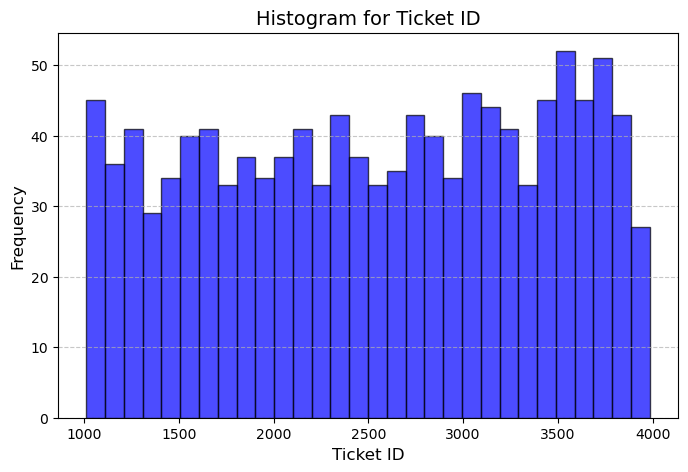

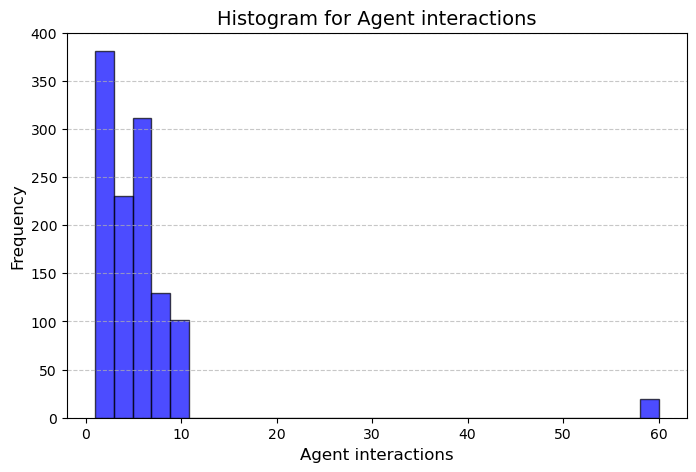

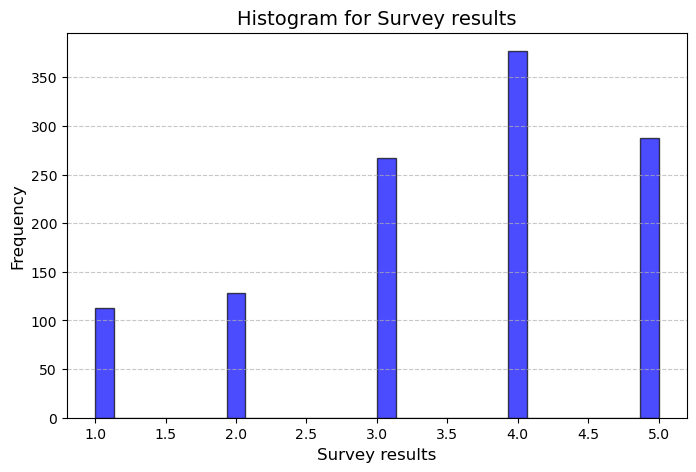

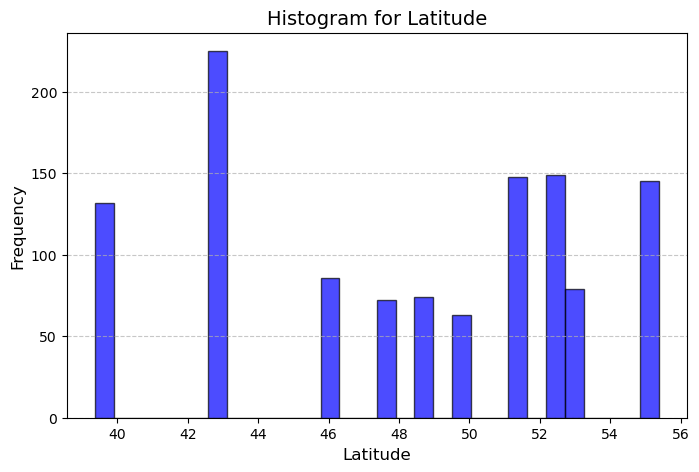

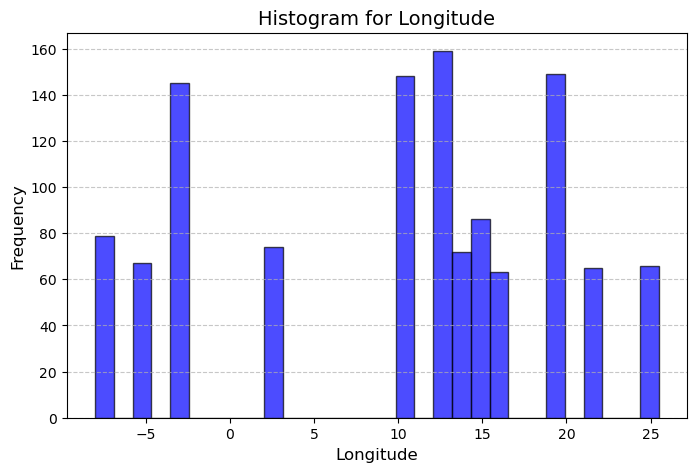

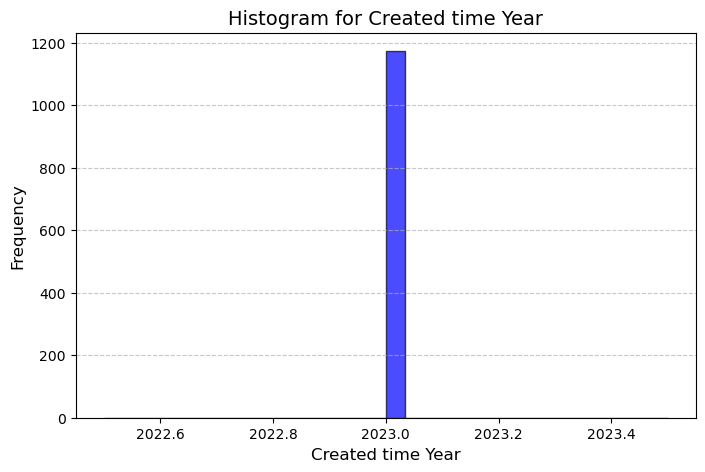

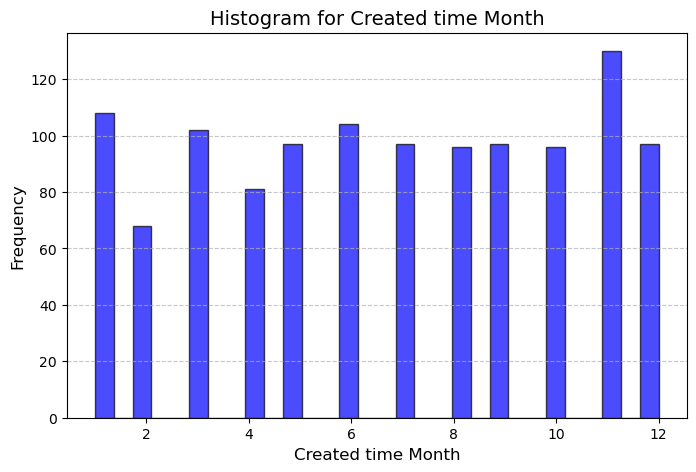

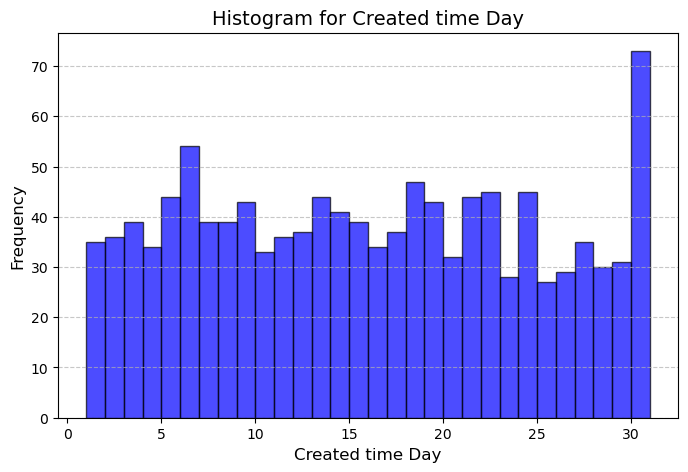

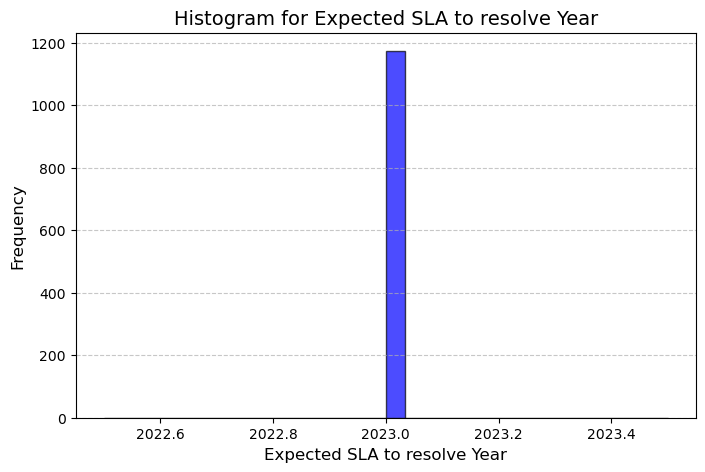

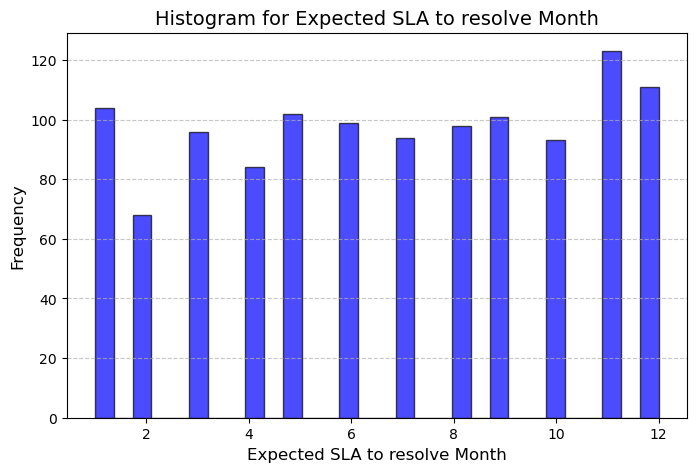

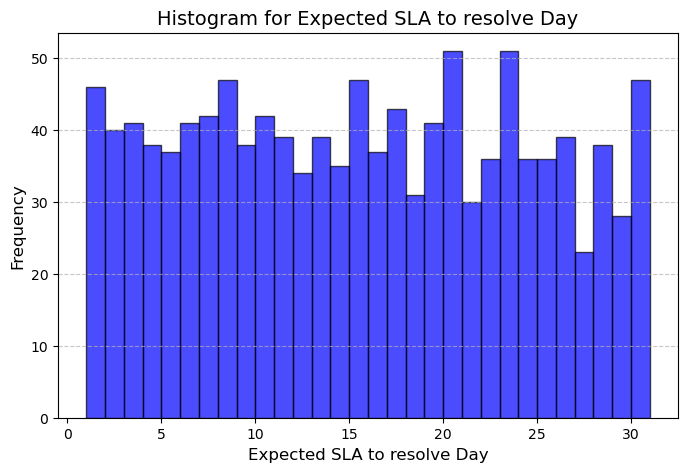

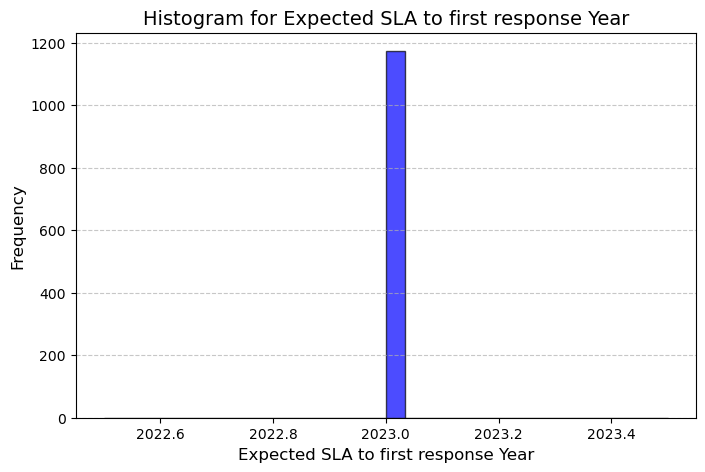

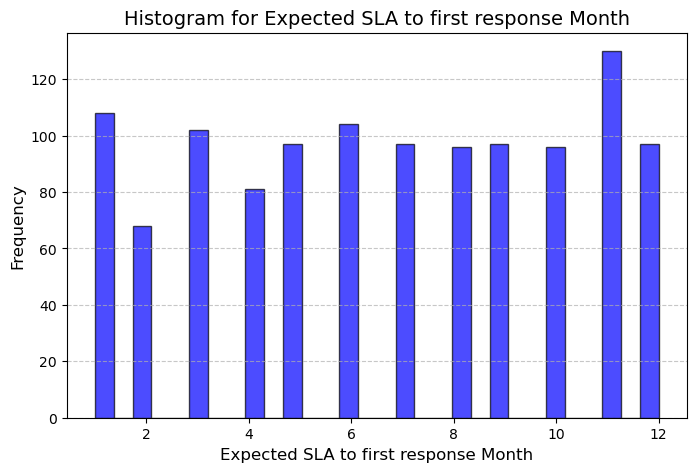

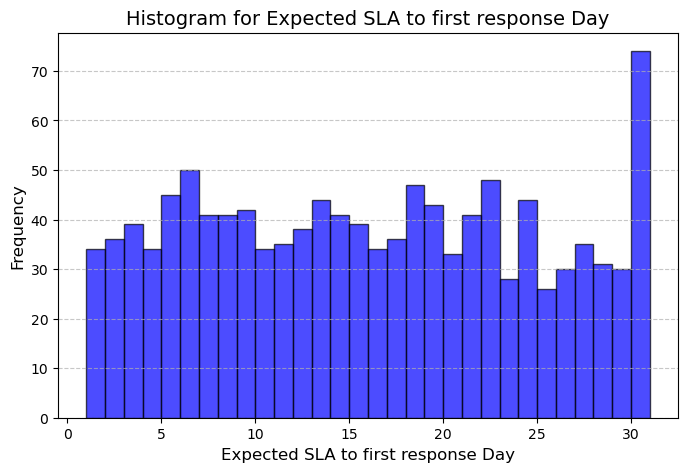

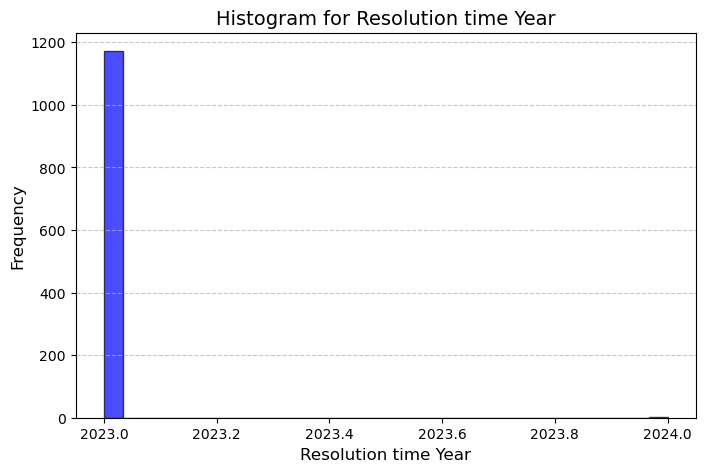

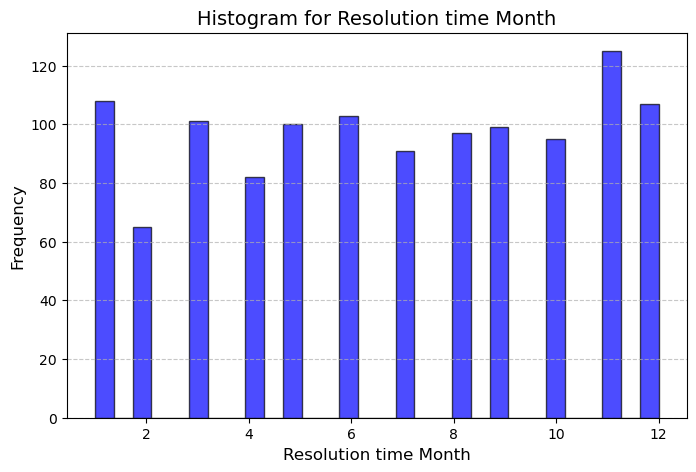

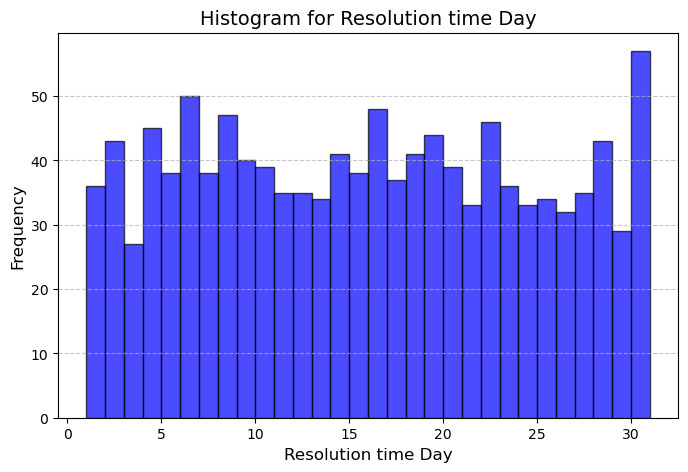

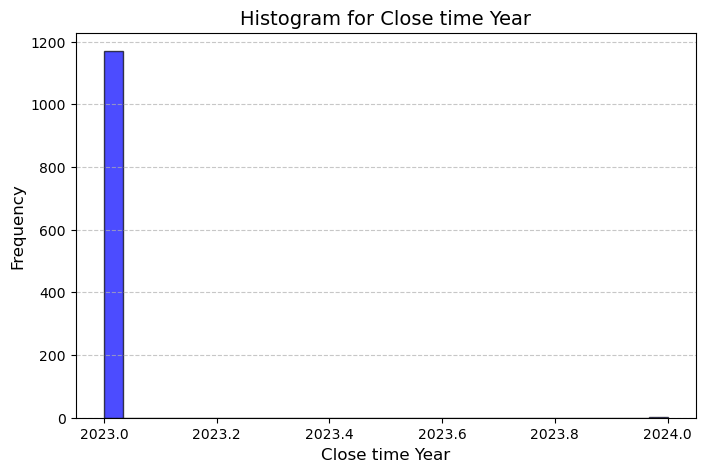

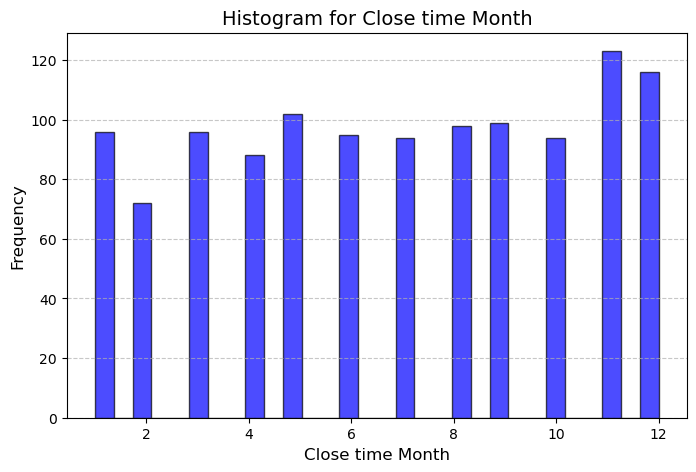

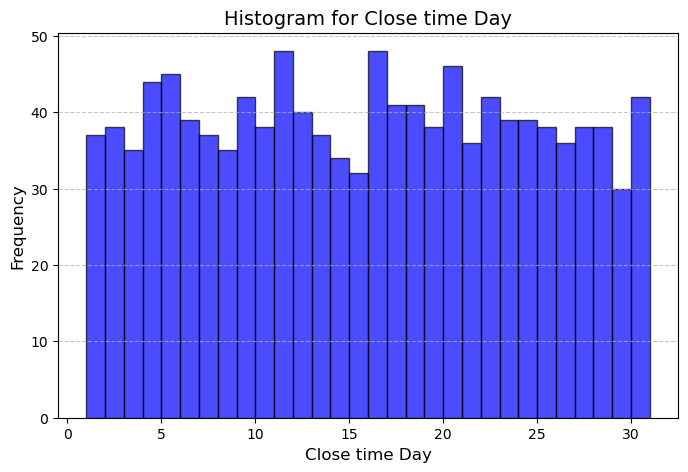

In [21]:
# Plot histograms for numerical columns with outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned[col].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [22]:
df60 = df_cleaned[df_cleaned['Agent interactions'] == 60]

In [23]:
df60.head()

Status  Ticket ID Priority Source            Topic       Agent Group  \
10   Closed       1024   Medium   Chat            Other  1st line support   
15   Closed       1029   Medium   Chat  Feature request  1st line support   
98   Closed       1134      Low   Chat    Product setup  1st line support   
166  Closed       1214      Low   Chat            Other  1st line support   
236  Closed       1297      Low   Chat    Product setup  1st line support   

          Agent Name        Created time Expected SLA to resolve  \
10   Bernard Beckley 2023-01-03 16:41:11     2023-01-04 16:41:11   
15   Bernard Beckley 2023-01-04 09:12:41     2023-01-05 09:12:41   
98     Sheela Cutten 2023-01-16 12:50:35     2023-01-17 12:50:35   
166    Sheela Cutten 2023-01-24 07:06:15     2023-01-25 07:06:15   
236    Sheela Cutten 2023-02-02 23:36:10     2023-02-03 23:36:10   

    Expected SLA to first response      First response time  \
10             2023-01-03 16:43:11  2023-01-03 16:43:40.942   
15             2023-01-04 09:14:41  2023-01-04 09:13:35.162   
98             2023-01-16 12:52:35  2023-01-16 12:51:00.245   
166            2023-01-24 07:08:15  2023-01-24 07:07:53.387   
236            2023-02-02 23:38:10  2023-02-02 23:37:50.697   

    SLA For first response         Resolution time SLA For Resolution  \
10            SLA Violated 2023-01-03 23:52:18.292         Within SLA   
15              Within SLA 2023-01-05 07:45:18.346         Within SLA   
98              Within SLA 2023-01-16 17:37:43.459         Within SLA   
166             Within SLA 2023-01-24 14:26:31.591         Within SLA   
236             Within SLA 2023-02-03 22:56:52.625         Within SLA   

                 Close time  Agent interactions  Survey results  \
10  2023-01-06 00:38:58.704                60.0             5.0   
15  2023-01-06 23:18:19.761                60.0             5.0   
98  2023-01-20 18:38:43.224                60.0             5.0   
166 2023-01-29 04:04:00.979                60.0             5.0   
236 2023-02-06 17:51:51.562                60.0             3.0   

                   Product group Support Level         Country   Latitude  \
10   Custom software development        Tier 1  Czech Republic  49.803763   
15   Custom software development        Tier 1         Germany  51.165691   
98   Custom software development        Tier 1           Spain  39.673370   
166        Ready to use Software        Tier 1  United Kingdom  55.378052   
236        Ready to use Software        Tier 1  Czech Republic  49.803763   

     Longitude  Created time Year  Created time Month  Created time Day  \
10   15.474913               2023                   1                 3   
15   10.451526               2023                   1                 4   
98   -4.767726               2023                   1                16   
166  -3.435973               2023                   1                24   
236  15.474913               2023                   2                 2   

    Created time Weekday Created time Time  Expected SLA to resolve Year  \
10               Tuesday          16:41:11                          2023   
15             Wednesday          09:12:41                          2023   
98                Monday          12:50:35                          2023   
166              Tuesday          07:06:15                          2023   
236             Thursday          23:36:10                          2023   

     Expected SLA to resolve Month  Expected SLA to resolve Day  \
10                               1                            4   
15                               1                            5   
98                               1                           17   
166                              1                           25   
236                              2                            3   

    Expected SLA to resolve Weekday Expected SLA to resolve Time  \
10                        Wednesday                     16:41:11   
15

In [24]:
df60['Topic'].value_counts()

Topic
Other                    5
Product setup            5
Bug report               4
Pricing and licensing    3
Feature request          2
Name: count, dtype: int64

In [25]:
df_cleaned['Topic'].value_counts()

Topic
Product setup               312
Pricing and licensing       244
Feature request             224
Purchasing and invoicing    133
Bug report                  103
Other                        93
Training request             35
Pricing and Licensing        29
Name: count, dtype: int64

Leave lines with 60 interactions

In [26]:
import folium

# Create a map centered on the average latitude and longitude
map_center = [df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()]
map_plot = folium.Map(location=map_center, zoom_start=5)

# Add markers for each row in the dataset
for _, row in df_cleaned.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Country: {row['Country']}, Product: {row['Product group']}",
    ).add_to(map_plot)

# Save the map to an HTML file
map_file_path = "latitude_longitude_map.html"
map_plot.save(map_file_path)

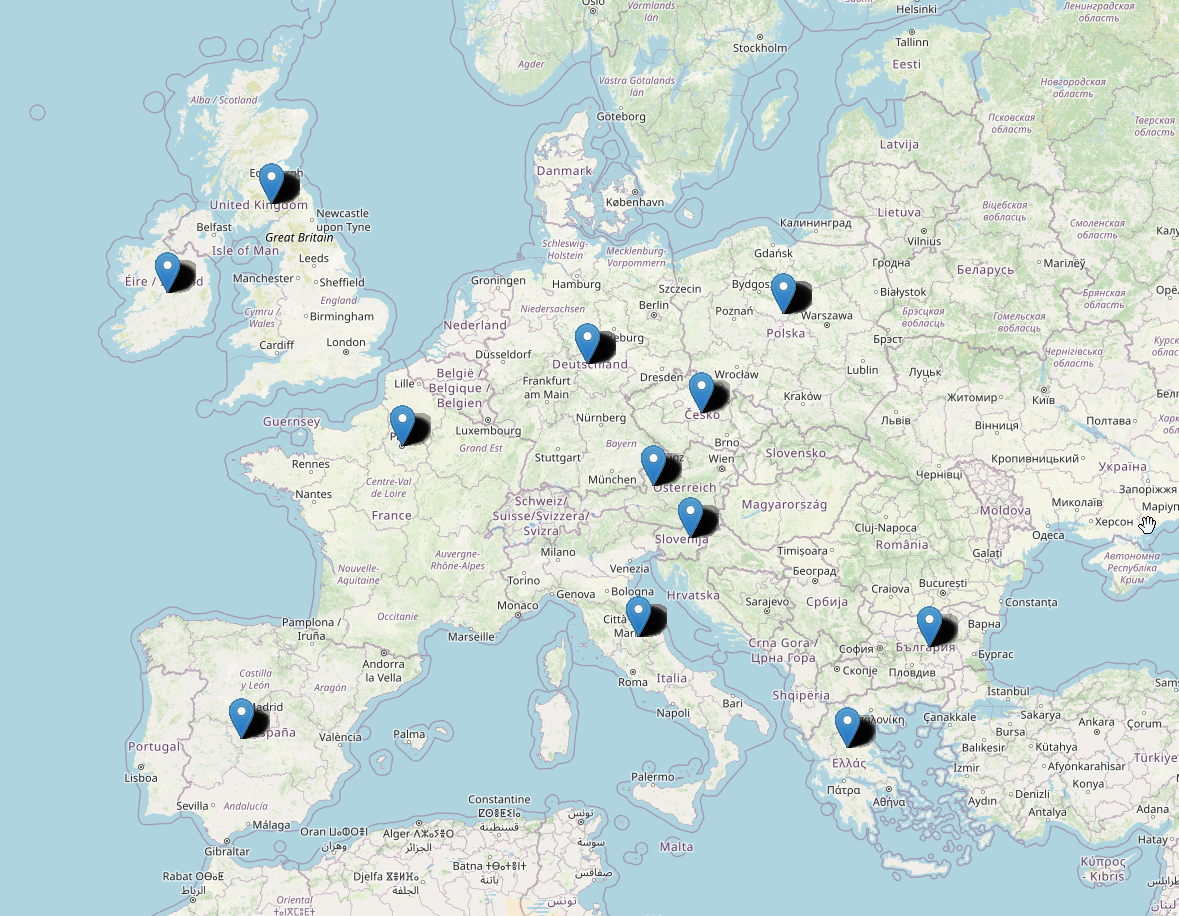

In [27]:
# Ensure necessary columns are available
if 'Country' in df_cleaned.columns and 'Survey results' in df_cleaned.columns and 'Latitude' in df_cleaned.columns and 'Longitude' in df_cleaned.columns:
    # Calculate the average survey result by country
    avg_survey_by_country = df_cleaned.groupby(['Country', 'Latitude', 'Longitude'])['Survey results'].mean().reset_index()

    # Create a map centered on the average latitude and longitude
    map_center = [avg_survey_by_country['Latitude'].mean(), avg_survey_by_country['Longitude'].mean()]
    survey_map = folium.Map(location=map_center, zoom_start=5)

    # Add markers for each country with visible average survey result and color coding
    for _, row in avg_survey_by_country.iterrows():
        # Determine the circle color based on the average survey result
        color = 'green' if row['Survey results'] > 3.5 else 'red'

        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=10,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=f"<b>{row['Country']}</b><br>Avg Survey Result: {row['Survey results']:.2f}"
        ).add_to(survey_map)

        # Add a label with the survey result visible on the map by default
       # folium.map.Marker(
           # [row['Latitude'], row['Longitude']],
           # icon=folium.DivIcon(html=f"""<div style="font-size: 10pt; color: {color};"><b>{row['Survey results']:.2f}</b></div>""")
       # ).add_to(survey_map)

    # Save the map to an HTML file
    map_file_path = "survey_results_map_with_labels.html"
    survey_map.save(map_file_path)
    map_file_path
else:
    "Required columns are missing: 'Country', 'Survey results', 'Latitude', or 'Longitude'."


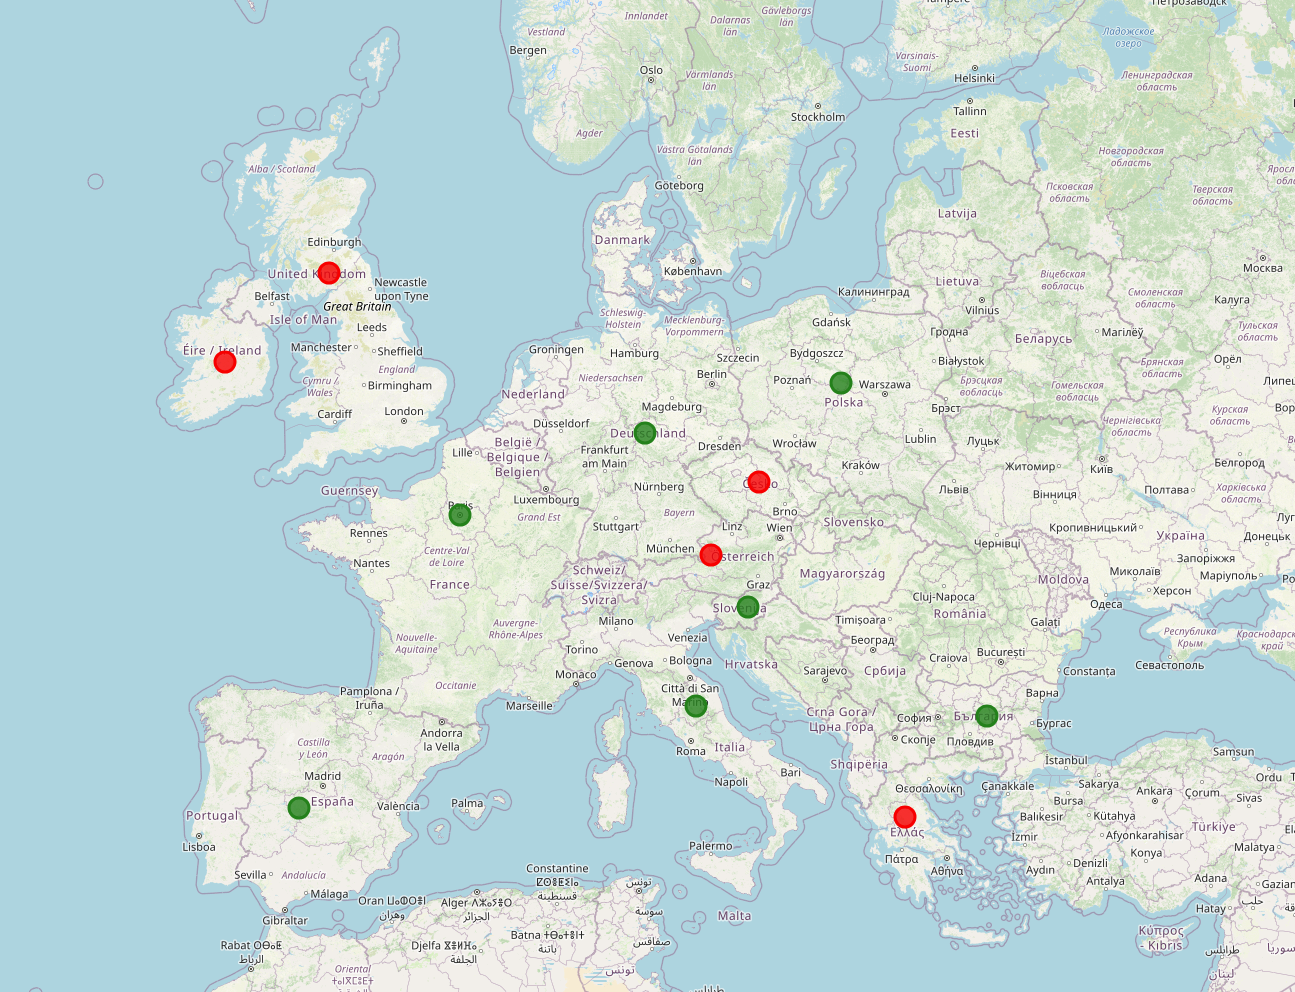

EDA

One-Hot Encoding

In [28]:
# Select columns for one-hot encoding
columns_to_encode = ['Priority', 'Source', 'Topic', 'Support Level', 'Country']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=columns_to_encode, drop_first=True)

df_encoded.head()

Status  Ticket ID       Agent Group           Agent Name  \
0  Closed       1012  1st line support      Kristos Westoll   
3  Closed       1015  1st line support  Connor Danielovitch   
4  Closed       1016  1st line support      Kristos Westoll   
5  Closed       1017  1st line support        Sheela Cutten   
6  Closed       1018  1st line support      Kristos Westoll   

         Created time Expected SLA to resolve Expected SLA to first response  \
0 2023-01-02 00:58:36     2023-01-04 00:58:36            2023-01-02 01:58:36   
3 2023-01-03 03:09:39     2023-01-05 03:09:39            2023-01-03 04:09:39   
4 2023-01-03 00:03:58     2023-01-05 00:03:58            2023-01-03 01:03:58   
5 2023-01-03 14:25:42     2023-01-05 14:25:42            2023-01-03 15:25:42   
6 2023-01-03 15:32:02     2023-01-05 15:32:02            2023-01-03 15:34:02   

       First response time SLA For first response         Resolution time  \
0  2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3  2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4  2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5  2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6  2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time  Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                 1.0   
3         Within SLA 2023-01-08 04:24:54.771                10.0   
4         Within SLA 2023-01-06 06:05:08.637                 1.0   
5         Within SLA 2023-01-10 16:41:07.865                 2.0   
6         Within SLA 2023-01-07 21:52:35.202                 2.0   

   Survey results                Product group   Latitude  Longitude  \
0             3.0  Custom software development  53.094024  -8.019675   
3             4.0        Ready to use Software  39.673370  -4.767726   
4             2.0                        Other  47.696472  13.345735   
5             2.0        Ready to use Software  39.368279  21.863141   
6             3.0        Ready to use Software  53.094024  -8.019675   

   Created time Year  Created time Month  Created time Day  \
0               2023                   1                 2   
3               2023                   1                 3   
4               2023                   1                 3   
5               2023                   1                 3   
6               2023                   1                 3   

  Created time Weekday Created time Time  Expected SLA to resolve Year  \
0               Monday          00:58:36                          2023   
3              Tuesday          03:09:39                          2023   
4              Tuesday          00:03:58                          2023   
5              Tuesday          14:25:42                          2023   
6              Tuesday          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday                     00:58:36   
3                        Thursday                     03:09:39   
4                        Thursday                     00:03:58   
5                        Thursday                     14:25:42   
6                        Thursday                     15:32:02   

   Expected SLA to first response Year  Expected SLA to first response Month  \
0                                 2023                                     1   
3                                 2023                                  

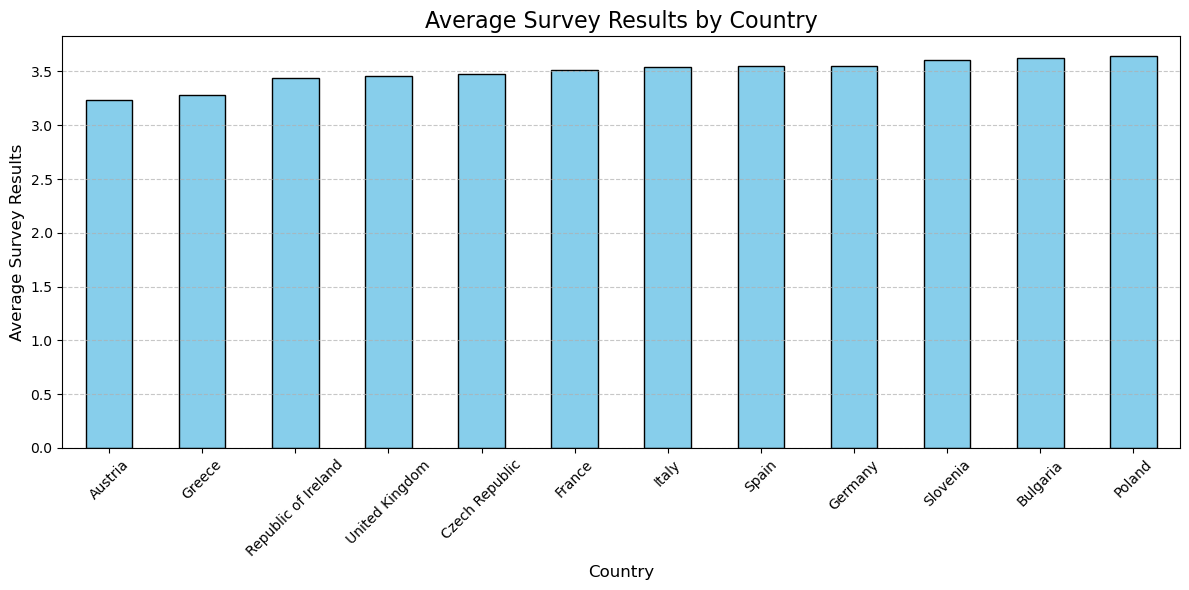

In [29]:
# Group by country and calculate the average survey results
country_survey = df_cleaned.groupby('Country')['Survey results'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_survey.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Survey Results by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Survey Results', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average Survey Result by Agent

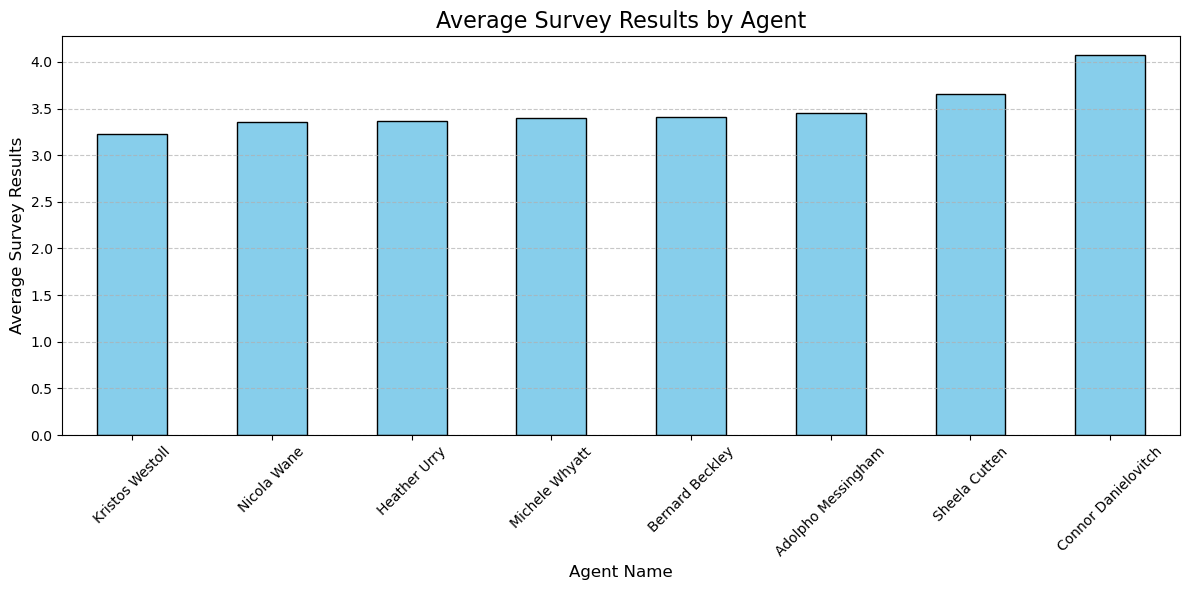

In [30]:
# Group by country and calculate the average survey results
country_survey = df_cleaned.groupby('Agent Name')['Survey results'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_survey.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Survey Results by Agent', fontsize=16)
plt.xlabel('Agent Name', fontsize=12)
plt.ylabel('Average Survey Results', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average Survey Result by Product Group

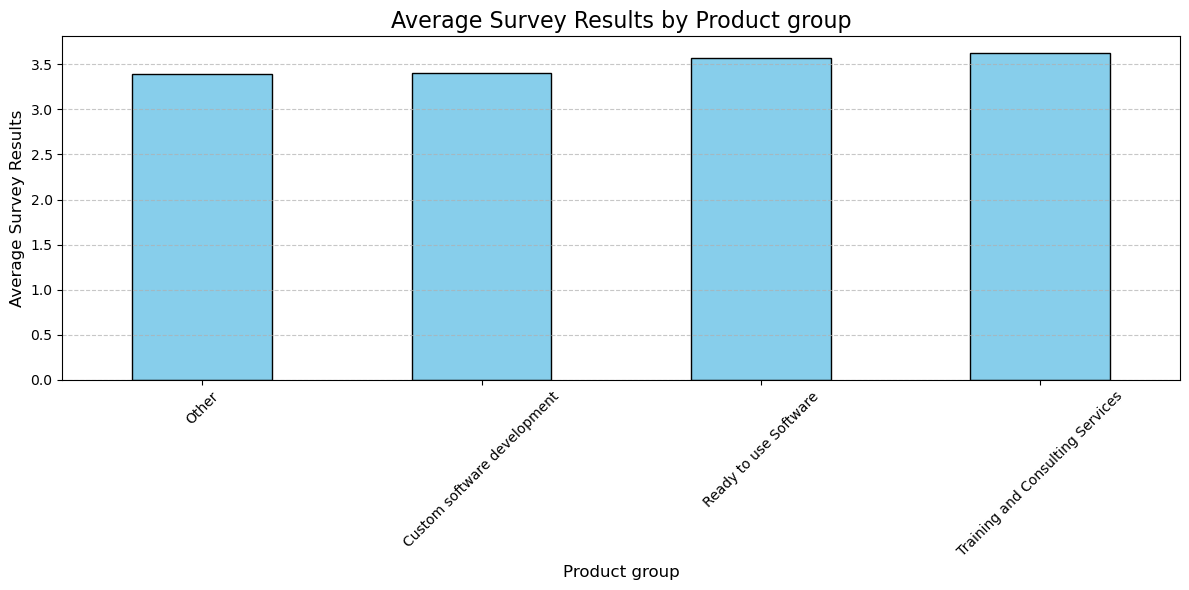

In [31]:
# Group by country and calculate the average survey results
country_survey = df_cleaned.groupby('Product group')['Survey results'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_survey.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Survey Results by Product group', fontsize=16)
plt.xlabel('Product group', fontsize=12)
plt.ylabel('Average Survey Results', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average Survey Result by Topic

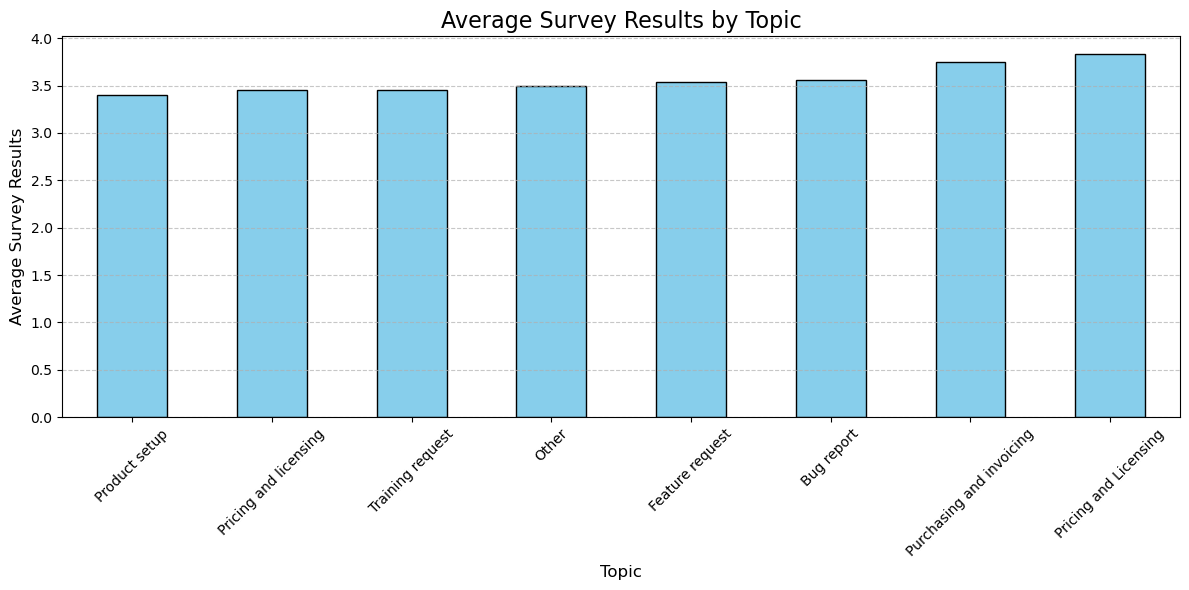

In [32]:
# Group by country and calculate the average survey results
country_survey = df_cleaned.groupby('Topic')['Survey results'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_survey.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Survey Results by Topic', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Average Survey Results', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Create Time to Resolve column
# Ensure 'Created time' and 'Resolution time' are in datetime format
df_cleaned['Created time'] = pd.to_datetime(df_cleaned['Created time'])
df_cleaned['Resolution time'] = pd.to_datetime(df_cleaned['Resolution time'])

# Calculate the time difference in hours
df_cleaned['Time to Resolve (Hours)'] = (df_cleaned['Resolution time'] - df_cleaned['Created time']).dt.total_seconds() / 3600

# Verify the column has been added
print(df_cleaned.head())

   Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2

In [34]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

       First response time SLA For first response         Resolution time  \
0  2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3  2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4  2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5  2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6  2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time  Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                 1.0   
3         Within SLA 2023-01-08 04:24:54.771                10.0   
4         Within SLA 2023-01-06 06:05:08.637                 1.0   
5         Within SLA 2023-01-10 16:41:07.865                 2.0   
6         Within SLA 2023-01-07 21:52:35.202                 2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday      

Average Resolve Time by Topic

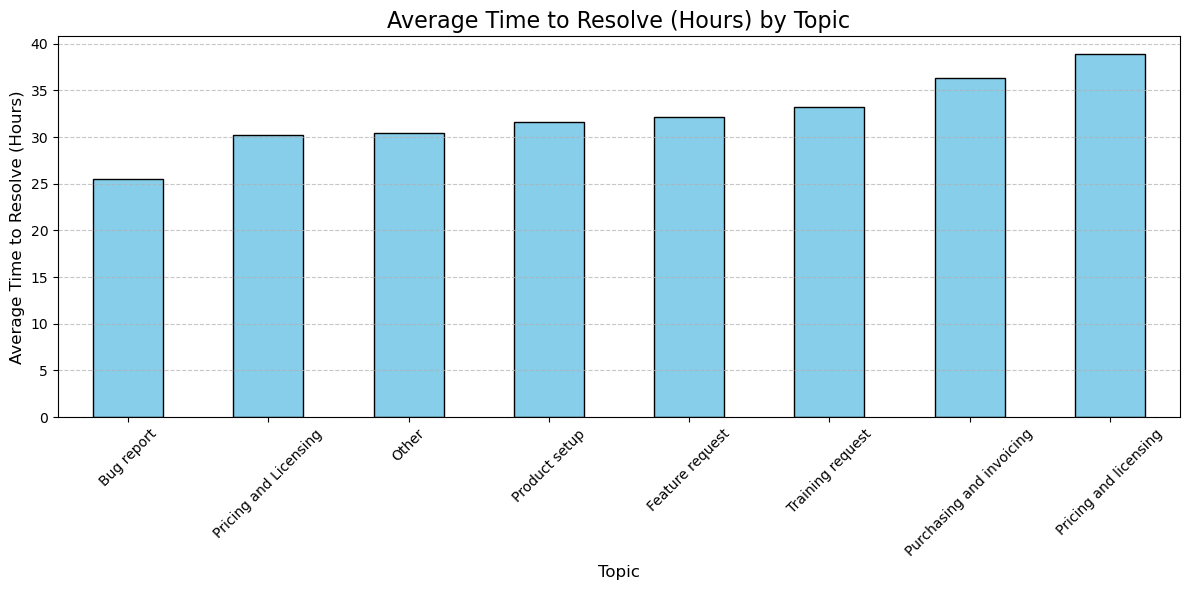

In [35]:
# Group by country and calculate the average survey results
country_survey = df_cleaned.groupby('Topic')['Time to Resolve (Hours)'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_survey.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time to Resolve (Hours) by Topic', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Average Time to Resolve (Hours)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

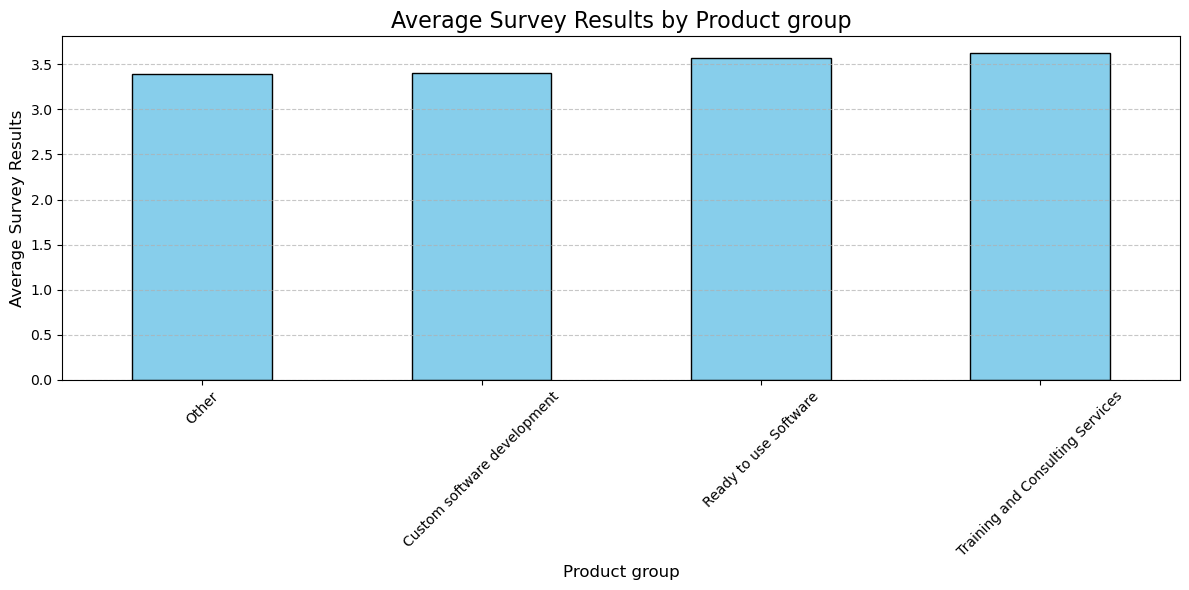

In [36]:
# Group by country and calculate the average survey results
country_survey = df_cleaned.groupby('Product group')['Survey results'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_survey.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Survey Results by Product group', fontsize=16)
plt.xlabel('Product group', fontsize=12)
plt.ylabel('Average Survey Results', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

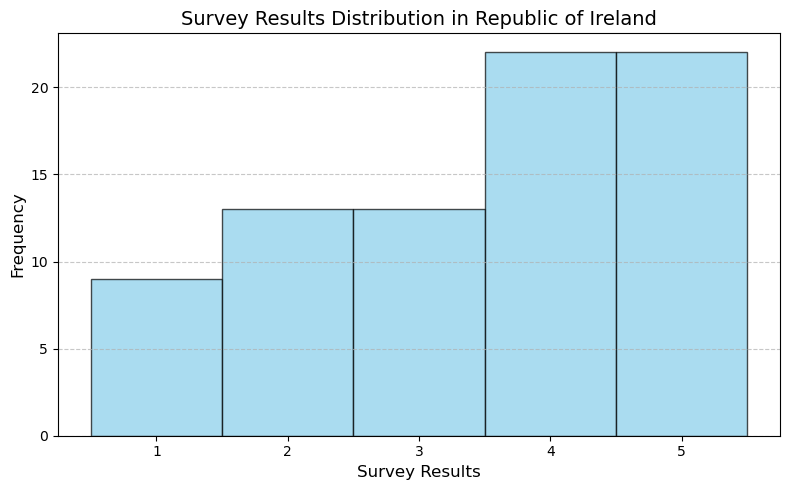

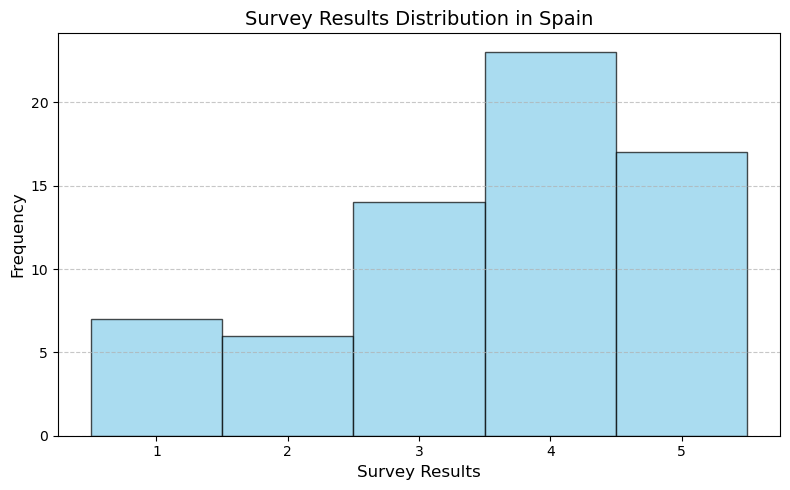

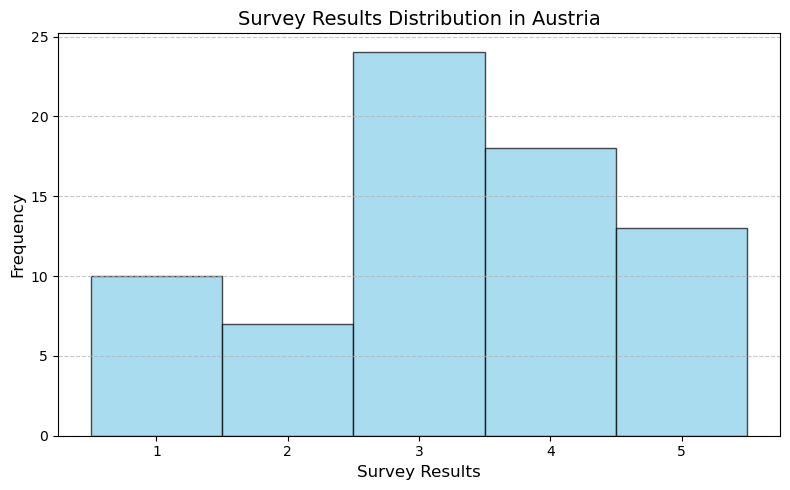

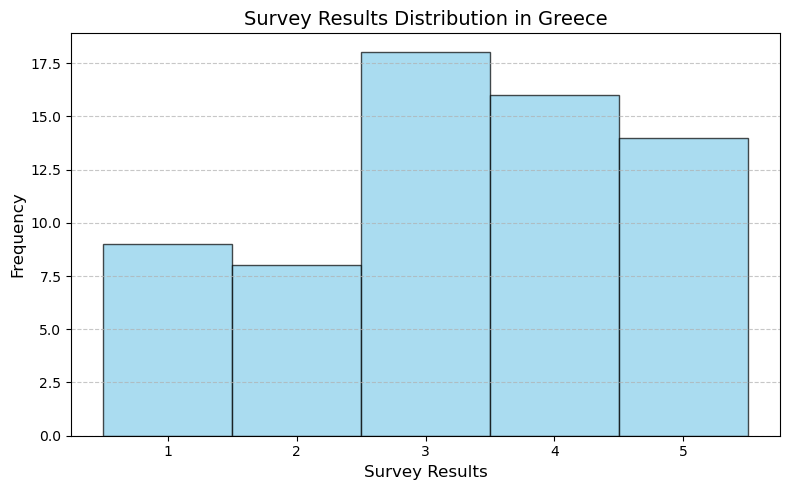

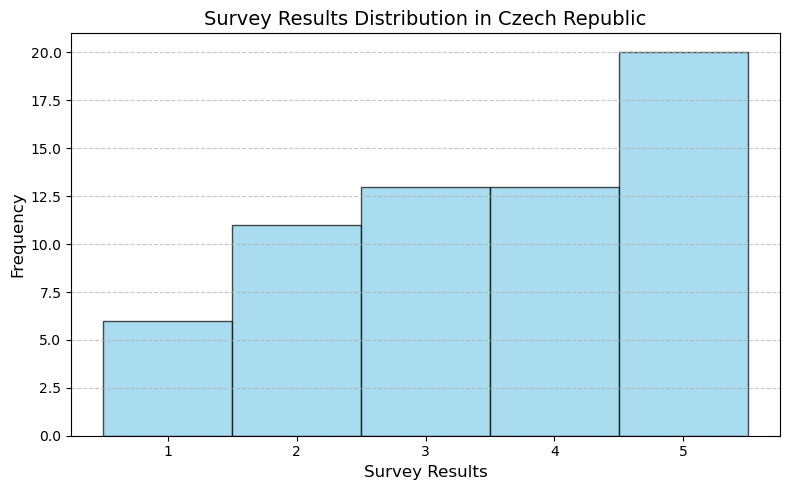

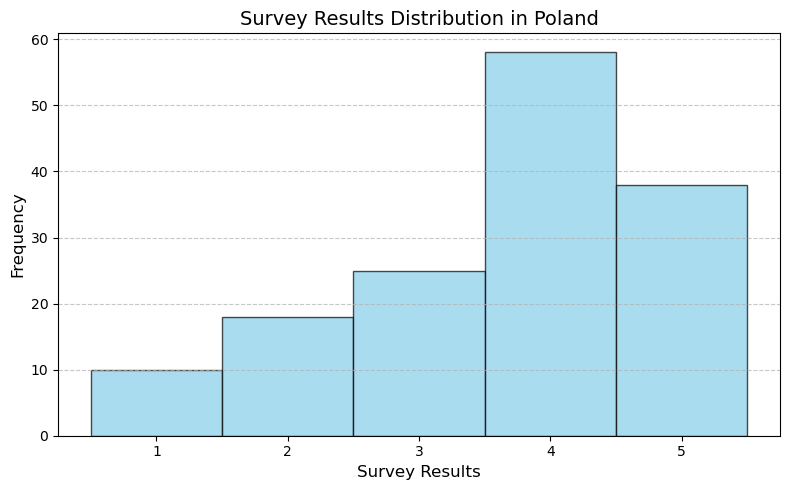

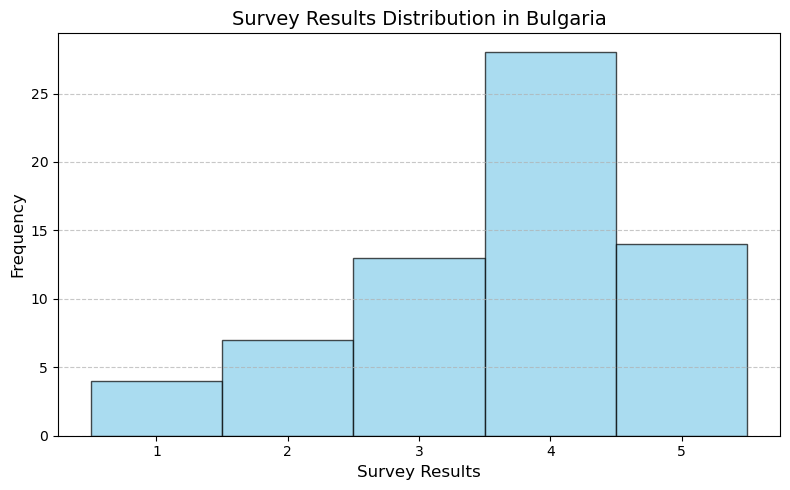

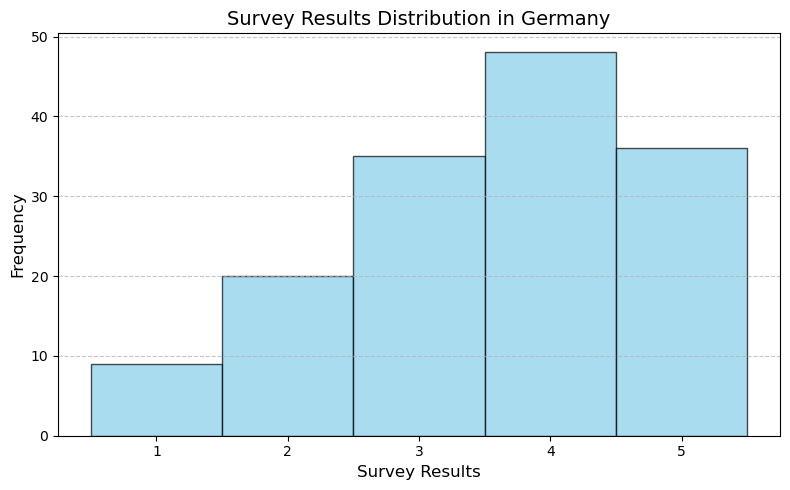

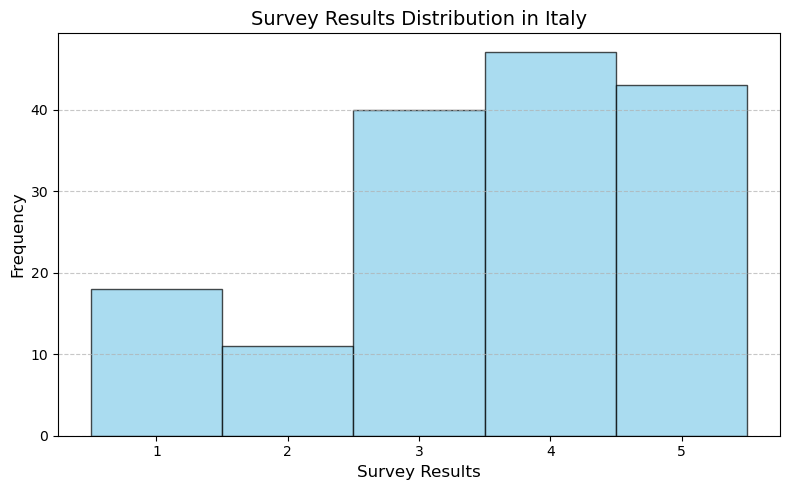

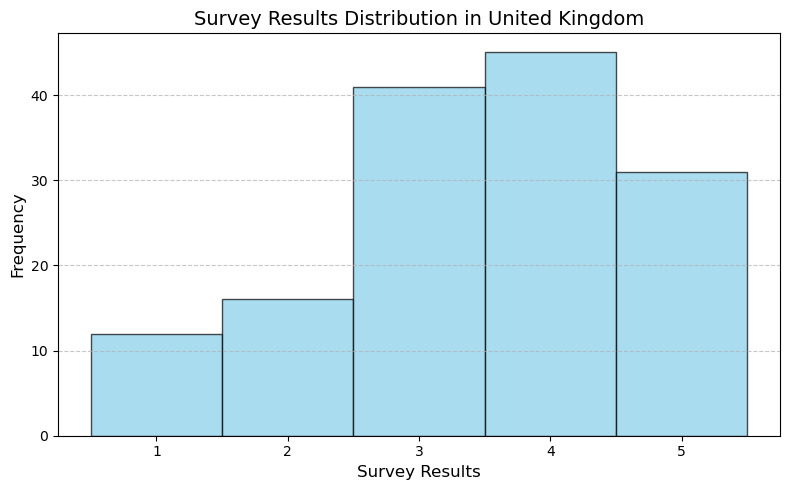

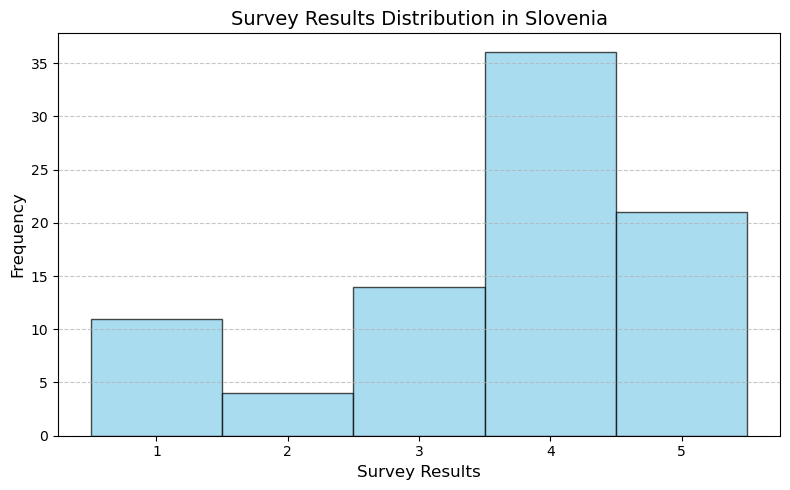

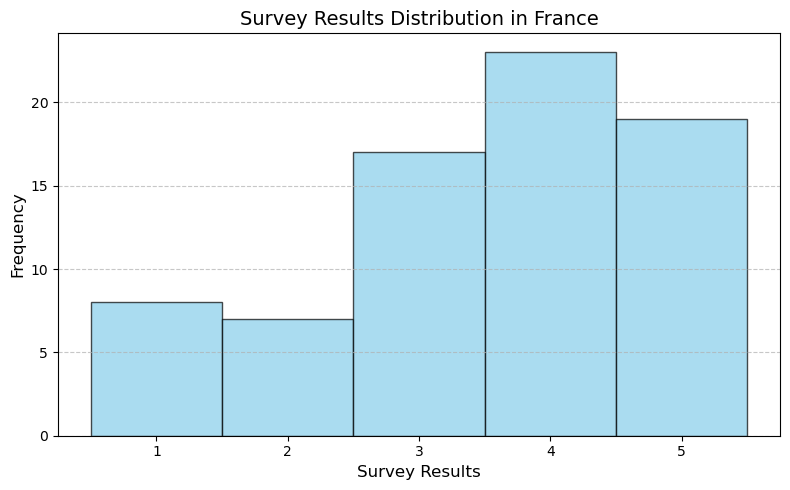

In [37]:
# Create histograms for survey results per country with corrected bins
if 'Country' in df_cleaned.columns and 'Survey results' in df_cleaned.columns:
    # Get unique countries
    unique_countries = df_cleaned['Country'].unique()

    for country in unique_countries:
        country_data = df_cleaned[df_cleaned['Country'] == country]['Survey results']
        plt.figure(figsize=(8, 5))
        plt.hist(country_data.dropna(), bins=5, range=(0.5, 5.5), color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Survey Results Distribution in {country}', fontsize=14)
        plt.xlabel('Survey Results', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(ticks=[1, 2, 3, 4, 5])  # Ensure x-ticks align with bins
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
else:
    print("The required columns 'Country' and 'Survey results' are not in the dataset.")

Adding a column with how many hours are expected by SLA

In [38]:
# Ensure necessary columns are available
if 'Created time' in df_cleaned.columns and 'Expected SLA to resolve' in df_cleaned.columns:
    # Convert the 'Created time' and 'Expected SLA to resolve' columns to datetime if not already
    df_cleaned['Created time'] = pd.to_datetime(df_cleaned['Created time'], errors='coerce')
    df_cleaned['Expected SLA to resolve'] = pd.to_datetime(df_cleaned['Expected SLA to resolve'], errors='coerce')

    # Calculate SLA expected resolution time in hours
    df_cleaned['Expected SLA (Hours)'] = (df_cleaned['Expected SLA to resolve'] - df_cleaned['Created time']).dt.total_seconds() / 3600

  
else:
    "The required columns 'Created time' and 'Expected SLA to resolve' are not in the dataset."


In [39]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

       First response time SLA For first response         Resolution time  \
0  2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3  2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4  2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5  2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6  2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time  Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                 1.0   
3         Within SLA 2023-01-08 04:24:54.771                10.0   
4         Within SLA 2023-01-06 06:05:08.637                 1.0   
5         Within SLA 2023-01-10 16:41:07.865                 2.0   
6         Within SLA 2023-01-07 21:52:35.202                 2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday      

Split in bins based on Time to Resolve:<br>
below 12 hours - Very Short
between 12 and 24 hours - Short
between 24 and 36 - Medium
between 36 and 48 - Long
above 48 - Very Long

In [40]:
# Ensure the 'Time to Resolve (Hours)' column exists
if 'Time to Resolve (Hours)' in df_cleaned.columns:
    # Define custom bins and labels
    bins = [0, 12, 24, 36, 48, float('inf')]
    labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

    # Create a new column for the groups based on the custom bins
    df_cleaned['Time to Resolve Group'] = pd.cut(df_cleaned['Time to Resolve (Hours)'], bins=bins, labels=labels, right=False)

    
else:
    "The column 'Time to Resolve (Hours)' is not in the dataset."



Average Survey result by Time to Resolve Group

In [41]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

       First response time SLA For first response         Resolution time  \
0  2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3  2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4  2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5  2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6  2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time  Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                 1.0   
3         Within SLA 2023-01-08 04:24:54.771                10.0   
4         Within SLA 2023-01-06 06:05:08.637                 1.0   
5         Within SLA 2023-01-10 16:41:07.865                 2.0   
6         Within SLA 2023-01-07 21:52:35.202                 2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday      

C:\Users\makar\AppData\Local\Temp\ipykernel_28636\1523613215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_survey = df_cleaned.groupby('Time to Resolve Group')['Survey results'].mean().sort_values()


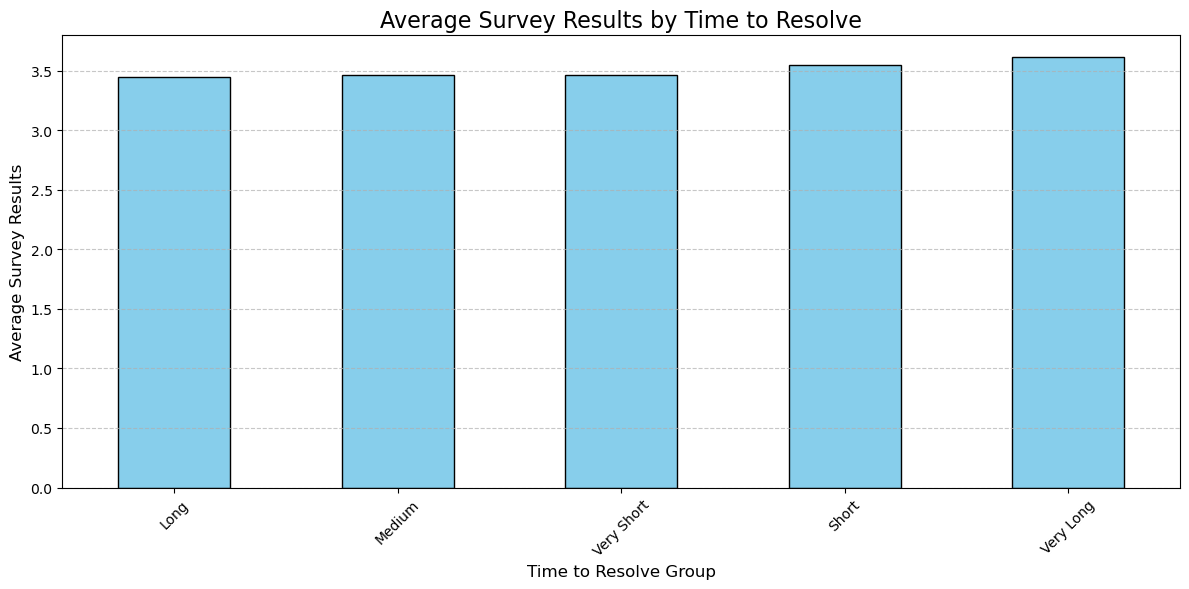

In [42]:
# Group by country and calculate the average survey results
country_survey = df_cleaned.groupby('Time to Resolve Group')['Survey results'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_survey.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Survey Results by Time to Resolve', fontsize=16)
plt.xlabel('Time to Resolve Group', fontsize=12)
plt.ylabel('Average Survey Results', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Create Correlation Heatmap

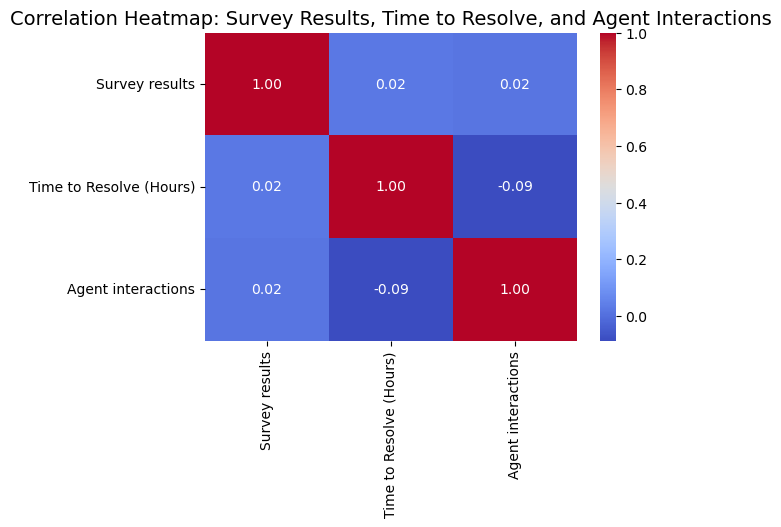

In [43]:
# Ensure the necessary columns exist
if all(col in df_cleaned.columns for col in ['Survey results', 'Time to Resolve (Hours)', 'Agent interactions']):
    # Select only the relevant columns for correlation
    correlation_data = df_cleaned[['Survey results', 'Time to Resolve (Hours)', 'Agent interactions']].dropna()

    # Compute the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap: Survey Results, Time to Resolve, and Agent Interactions", fontsize=14)
    plt.show()
else:
    print("One or more required columns ('Survey results', 'Time to Resolve (Hours)', 'Agent interactions') are not in the dataset.")


Adding column Time to First Response

In [44]:
# Sample code to create 'Time to First Response' column
# Ensure 'Created time' and 'First response time' are in datetime format
df_cleaned['Created time'] = pd.to_datetime(df_cleaned['Created time'])
df_cleaned['First response time'] = pd.to_datetime(df_cleaned['First response time'])
# Calculate 'Time to First Response' in hours
df_cleaned['Time to First Response (Hours)'] = (
    (df_cleaned['First response time'] - df_cleaned['Created time']).dt.total_seconds() / 3600
)

In [45]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

      First response time SLA For first response         Resolution time  \
0 2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3 2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4 2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5 2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6 2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time  Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                 1.0   
3         Within SLA 2023-01-08 04:24:54.771                10.0   
4         Within SLA 2023-01-06 06:05:08.637                 1.0   
5         Within SLA 2023-01-10 16:41:07.865                 2.0   
6         Within SLA 2023-01-07 21:52:35.202                 2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday            

In [46]:
# One-hot encode the "Time to Resolve Group"
time_to_resolve_encoded = pd.get_dummies(df_cleaned['Time to Resolve Group'], prefix='Resolve_Group')

# Add the one-hot encoded columns back to the original dataframe
df_cleaned = pd.concat([df_cleaned, time_to_resolve_encoded], axis=1)



In [47]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

      First response time SLA For first response         Resolution time  \
0 2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3 2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4 2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5 2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6 2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time  Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                 1.0   
3         Within SLA 2023-01-08 04:24:54.771                10.0   
4         Within SLA 2023-01-06 06:05:08.637                 1.0   
5         Within SLA 2023-01-10 16:41:07.865                 2.0   
6         Within SLA 2023-01-07 21:52:35.202                 2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday            

In [48]:
df_cleaned['Topic'].unique()

array(['Feature request', 'Pricing and licensing', 'Product setup',
       'Purchasing and invoicing', 'Other', 'Bug report',
       'Training request', 'Pricing and Licensing'], dtype=object)

In [49]:
# Remove leading/trailing whitespaces and replace empty values with a placeholder
df_cleaned['Topic'] = df_cleaned['Topic'].str.strip().fillna('Unknown')

In [50]:
unique_topics = df_cleaned['Topic'].nunique()
custom_palette = sns.color_palette("Set2", unique_topics)  # Dynamically assign colors

In [75]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 2322
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Status                                  1173 non-null   object        
 1   Ticket ID                               1173 non-null   int64         
 2   Priority                                1173 non-null   object        
 3   Source                                  1173 non-null   object        
 4   Topic                                   1173 non-null   category      
 5   Agent Group                             1173 non-null   object        
 6   Agent Name                              1173 non-null   category      
 7   Created time                            1173 non-null   datetime64[ns]
 8   Expected SLA to resolve                 1173 non-null   datetime64[ns]
 9   Expected SLA to first response          1173 non-null   d

In [71]:
df_cleaned['Topic'] = df_cleaned['Topic'].astype('category')
df_cleaned['Topic'].info()

<class 'pandas.core.series.Series'>
Index: 1173 entries, 0 to 2322
Series name: Topic
Non-Null Count  Dtype   
--------------  -----   
1173 non-null   category
dtypes: category(1)
memory usage: 10.7 KB


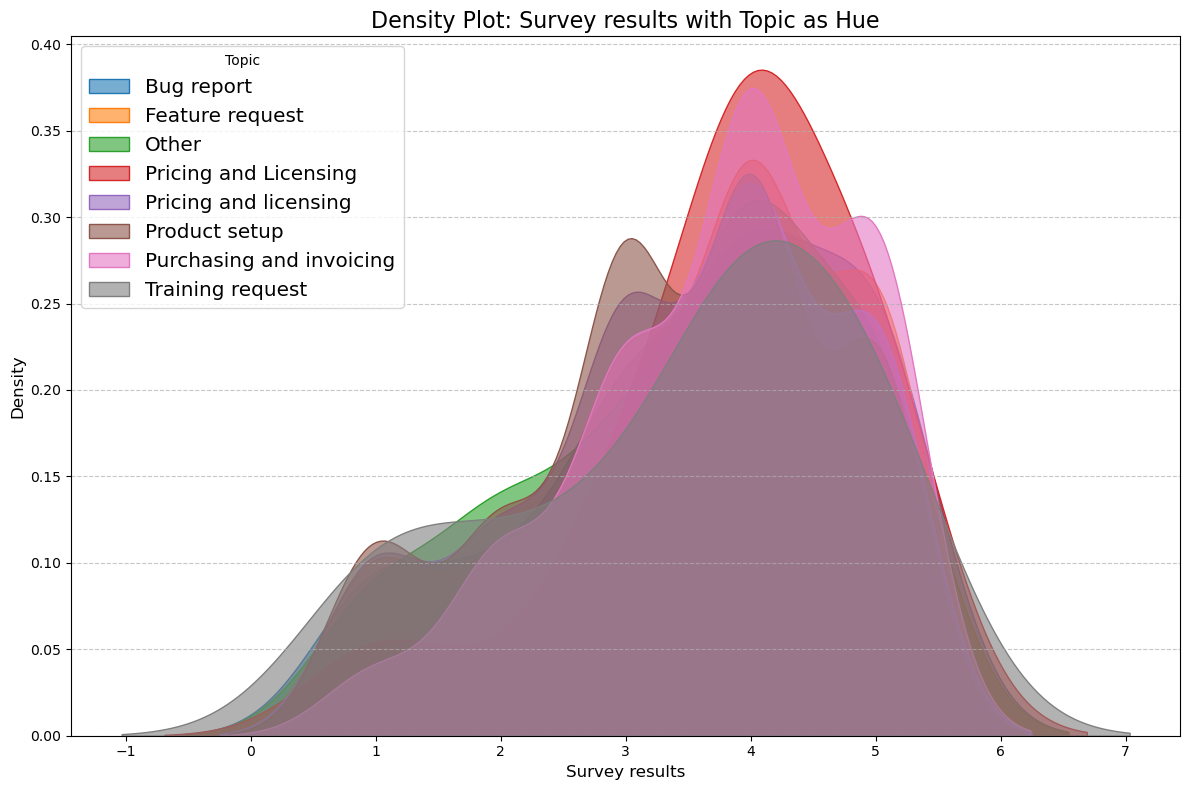

In [89]:
# KDE Plot with Survey Results on x-axis, density on y-axis, and Topic as hue
df_cleaned['Topic'] = df_cleaned['Topic'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['Topic'].cat.categories  # Get categories

for category in categories:
    subset = df_cleaned[df_cleaned['Topic'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Topic as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Topic', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

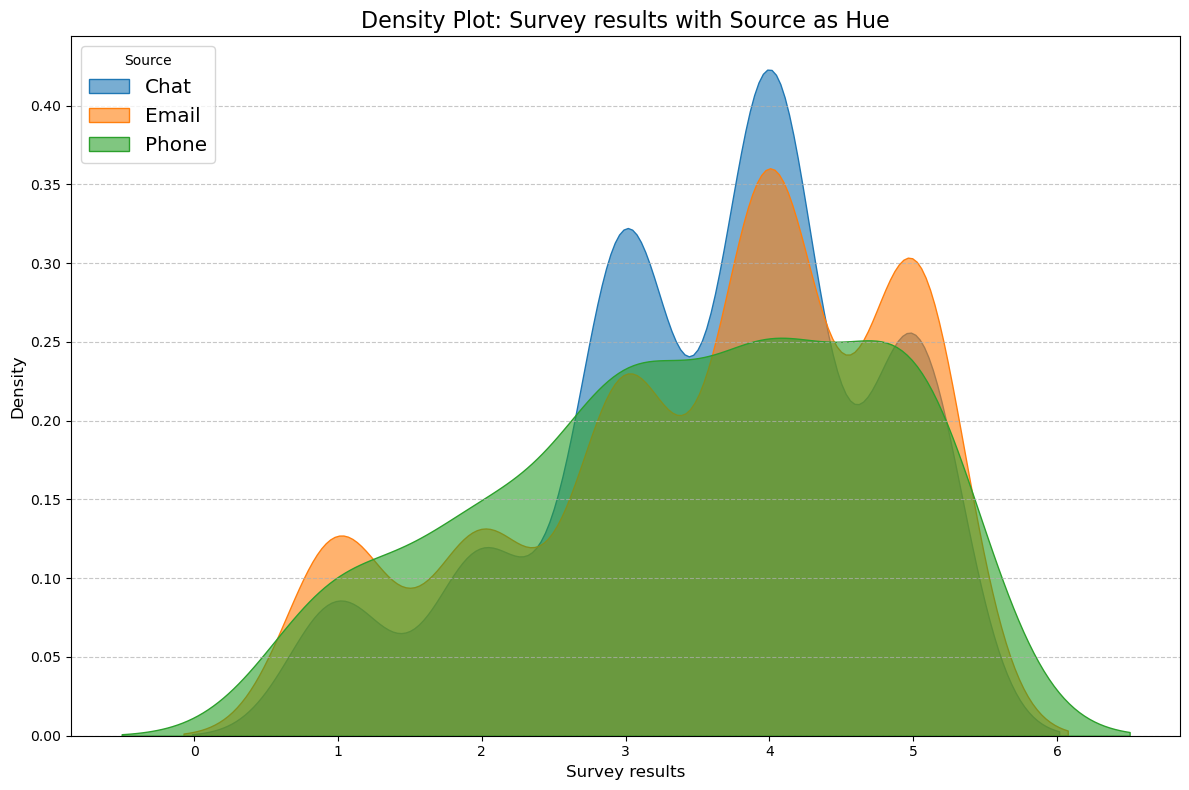

In [88]:
# KDE Plot with Survey Results on x-axis, density on y-axis, and Topic as hue
df_cleaned['Source'] = df_cleaned['Source'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['Source'].cat.categories  # Get categories

for category in categories:
    subset = df_cleaned[df_cleaned['Source'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Source as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Source', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [69]:
df_cleaned['Agent Name'] = df_cleaned['Agent Name'].astype('category')
df_cleaned['Agent Name'].info()

<class 'pandas.core.series.Series'>
Index: 1173 entries, 0 to 2322
Series name: Agent Name
Non-Null Count  Dtype   
--------------  -----   
1173 non-null   category
dtypes: category(1)
memory usage: 10.7 KB


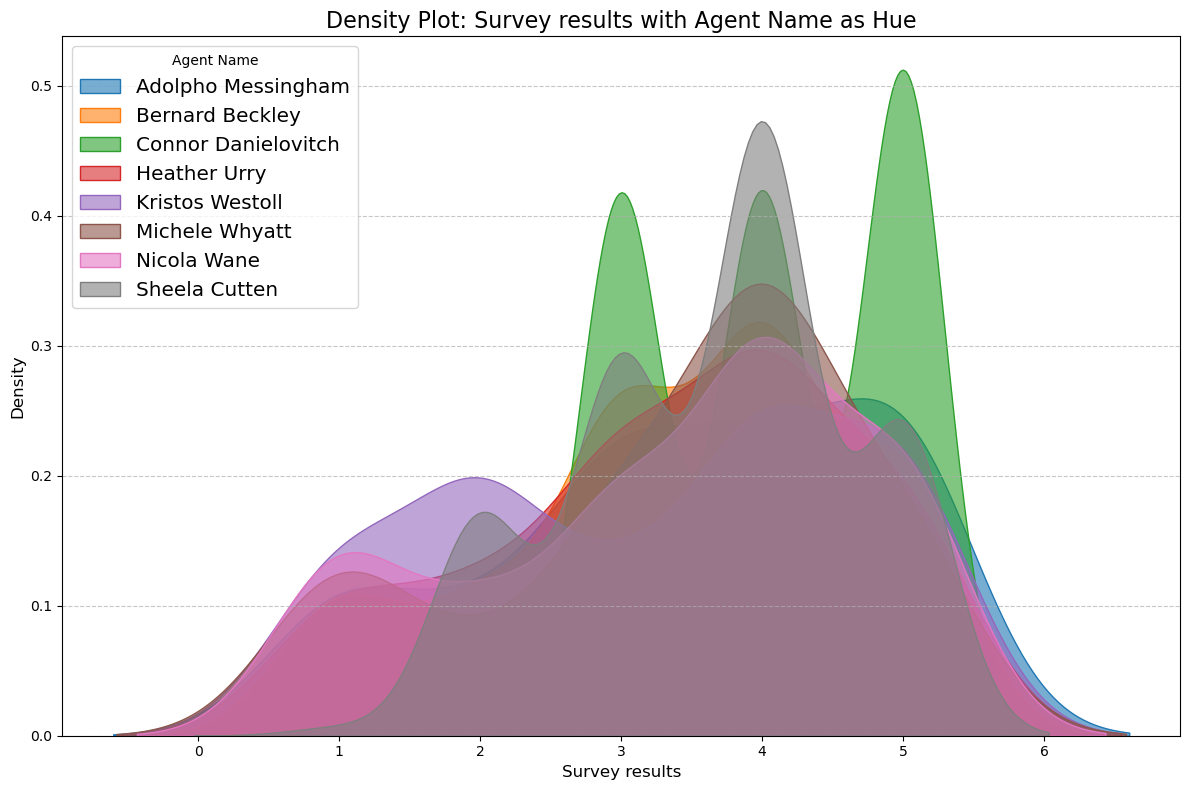

In [84]:
plt.figure(figsize=(12, 8))
categories = df_cleaned['Agent Name'].cat.categories  # Get categories
for category in categories:
    subset = df_cleaned[df_cleaned['Agent Name'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Agent Name as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Agent Name', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


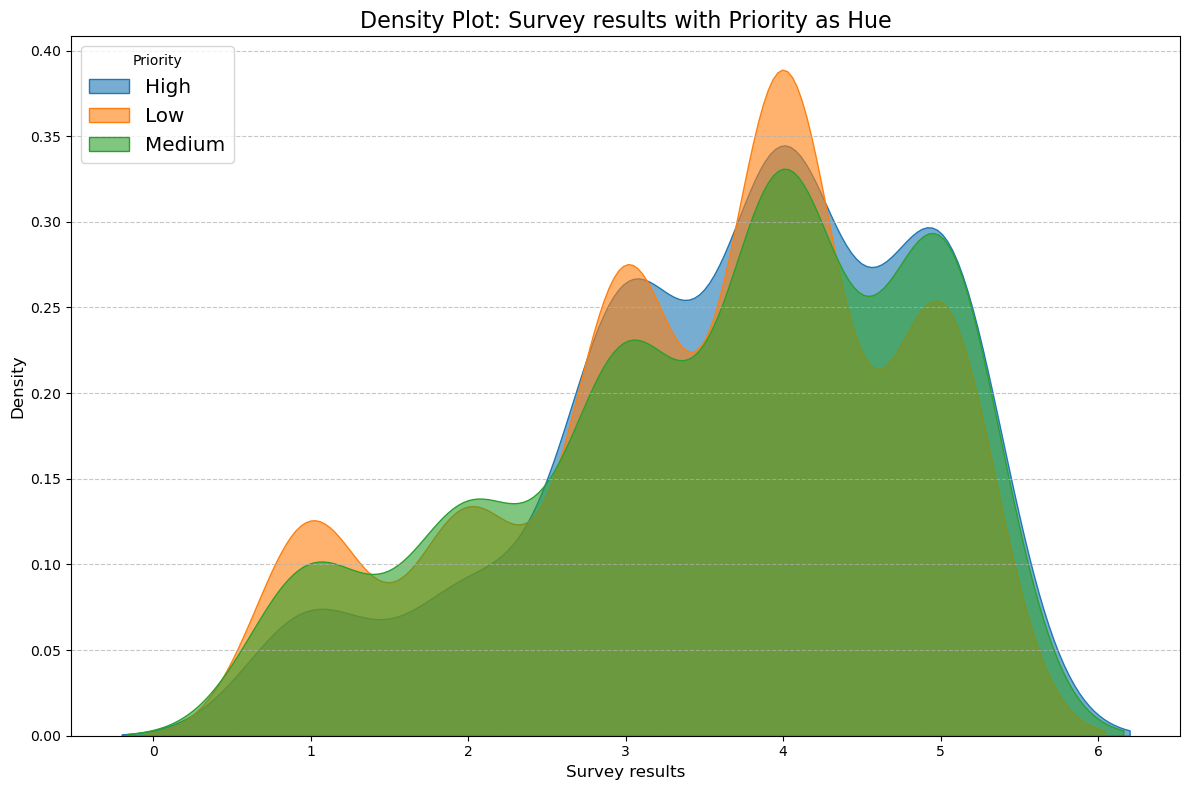

In [82]:
df_cleaned['Priority'] = df_cleaned['Priority'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['Priority'].cat.categories  # Get categories
for category in categories:
    subset = df_cleaned[df_cleaned['Priority'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Priority as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Priority', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



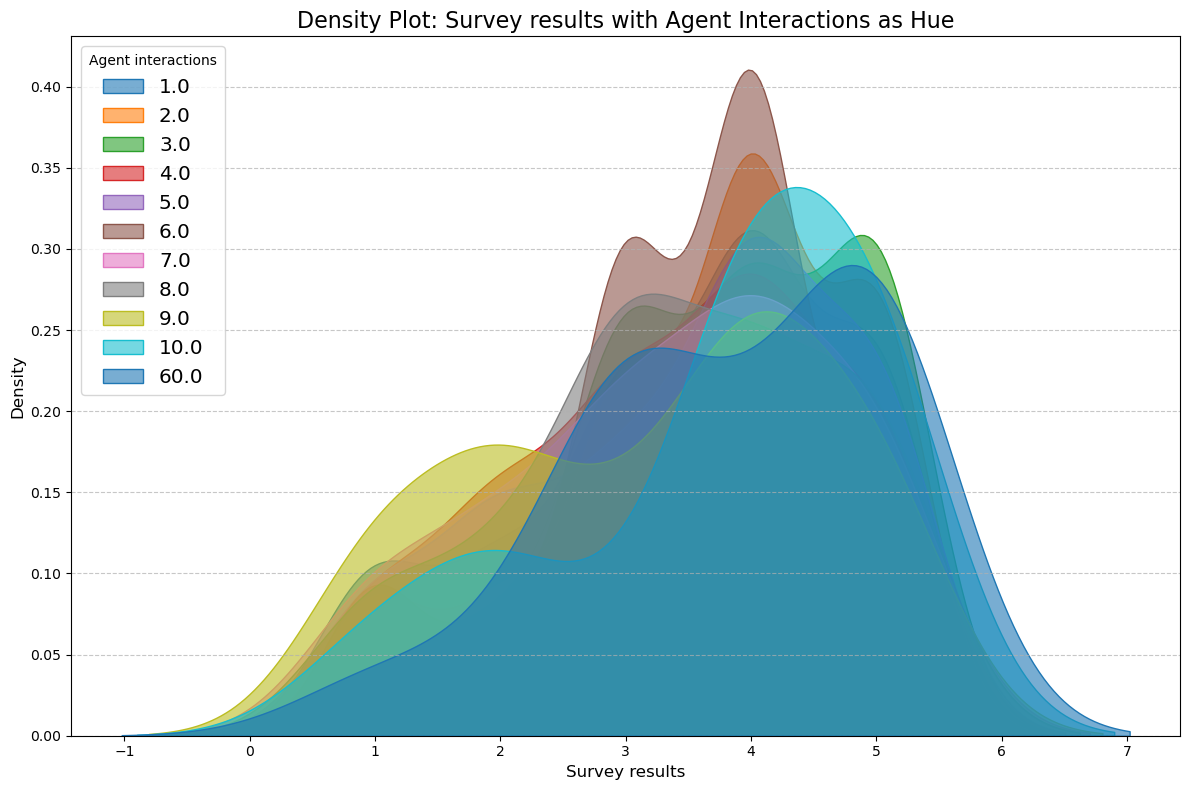

In [83]:
plt.figure(figsize=(12, 8))
categories = df_cleaned['Agent interactions'].cat.categories  # Get categories
for category in categories:
    subset = df_cleaned[df_cleaned['Agent interactions'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Agent Interactions as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Agent interactions', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [90]:
df_cleaned.head()

Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

      First response time SLA For first response         Resolution time  \
0 2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3 2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4 2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5 2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6 2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                1.0   
3         Within SLA 2023-01-08 04:24:54.771               10.0   
4         Within SLA 2023-01-06 06:05:08.637                1.0   
5         Within SLA 2023-01-10 16:41:07.865                2.0   
6         Within SLA 2023-01-07 21:52:35.202                2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday                  

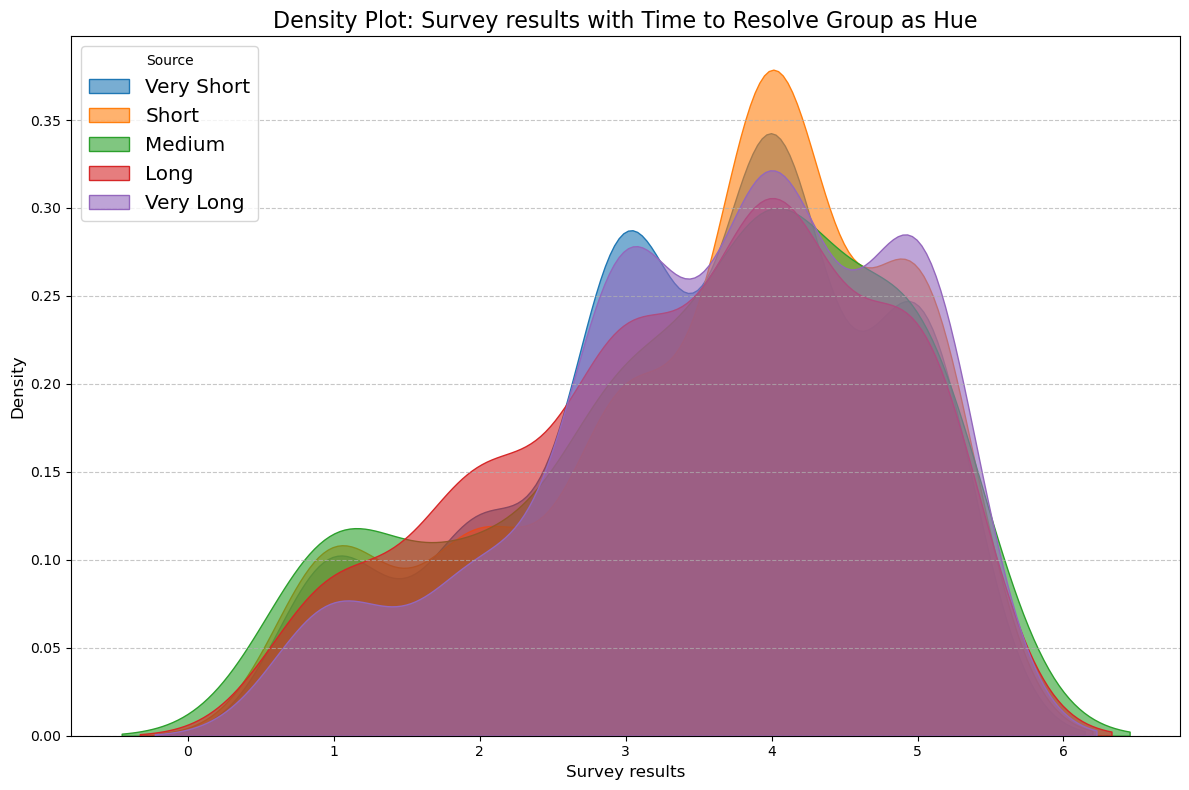

In [95]:
# KDE Plot with Survey Results on x-axis, density on y-axis, and Topic as hue
df_cleaned['Time to Resolve Group'] = df_cleaned['Time to Resolve Group'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['Time to Resolve Group'].cat.categories  # Get categories

for category in categories:
    subset = df_cleaned[df_cleaned['Time to Resolve Group'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Time to Resolve Group as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Source', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

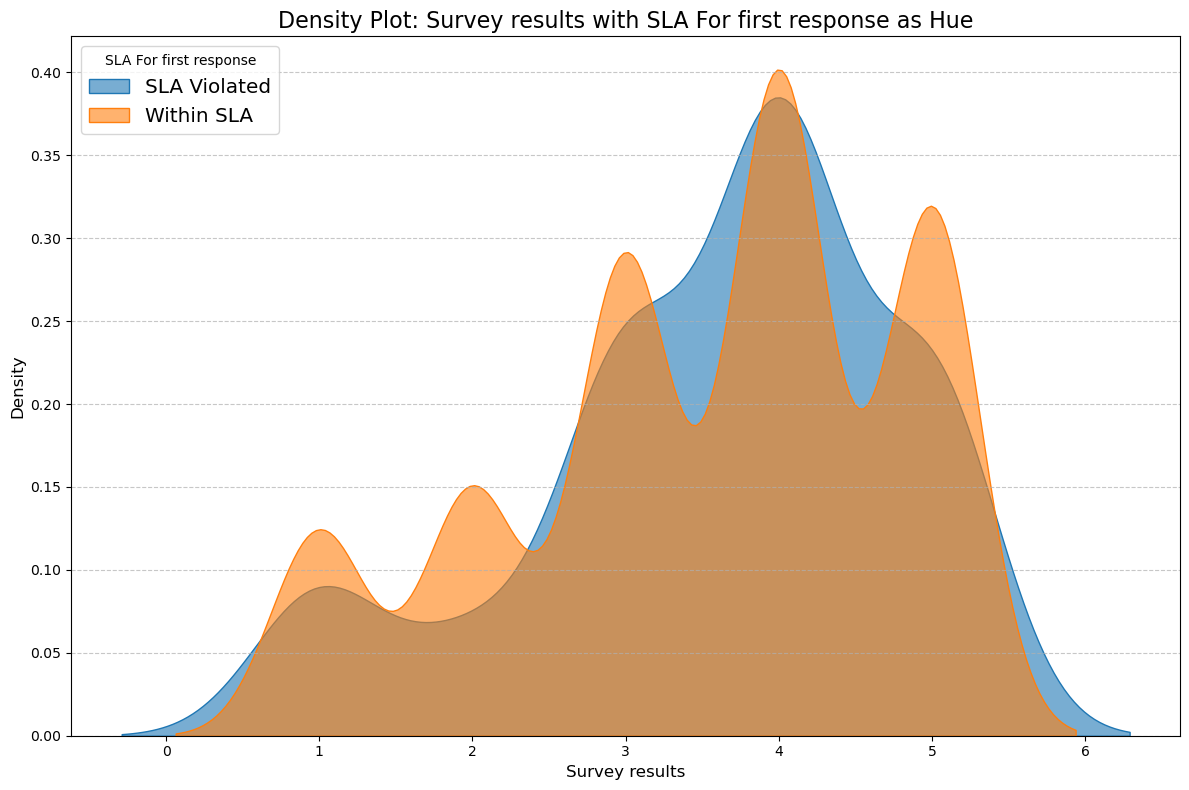

In [97]:
# KDE Plot with Survey Results on x-axis, density on y-axis, and Topic as hue
df_cleaned['SLA For first response'] = df_cleaned['SLA For first response'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['SLA For first response'].cat.categories  # Get categories

for category in categories:
    subset = df_cleaned[df_cleaned['SLA For first response'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with SLA For first response as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='SLA For first response', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

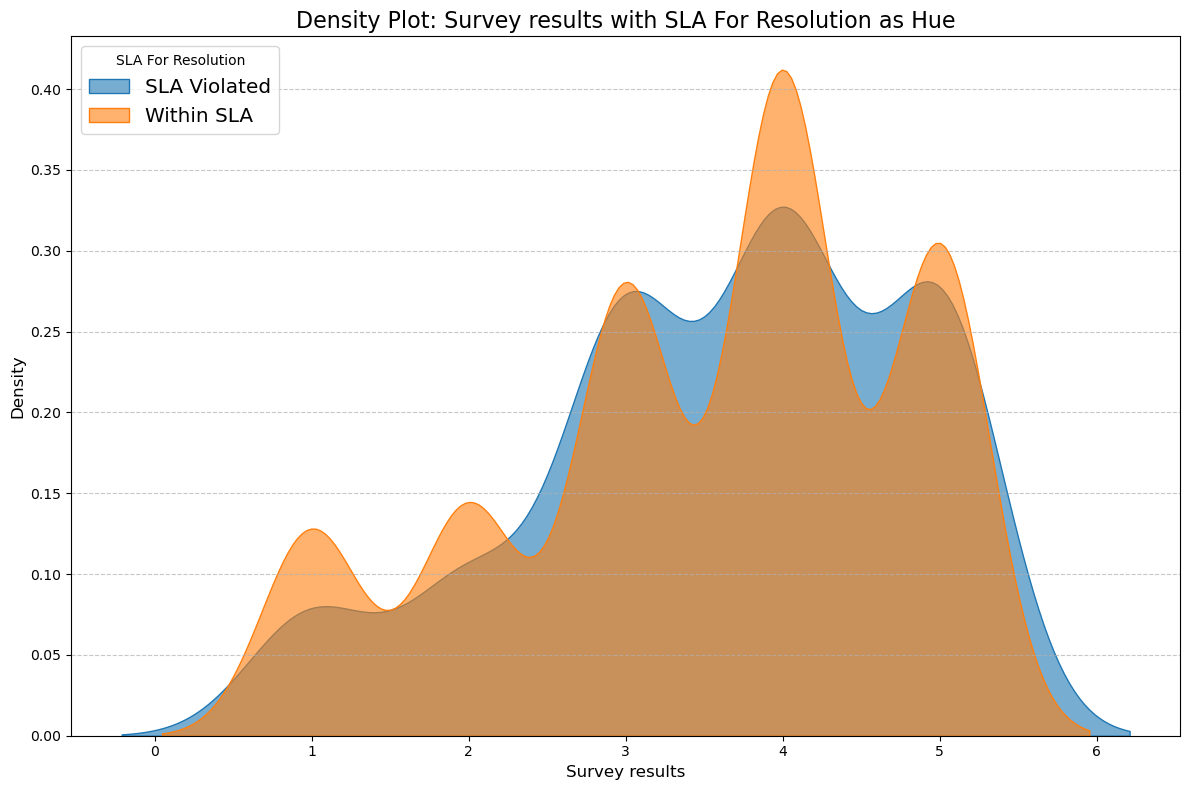

In [98]:
# KDE Plot with Survey Results on x-axis, density on y-axis, and Topic as hue
df_cleaned['SLA For Resolution'] = df_cleaned['SLA For Resolution'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['SLA For Resolution'].cat.categories  # Get categories

for category in categories:
    subset = df_cleaned[df_cleaned['SLA For Resolution'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with SLA For Resolution as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='SLA For Resolution', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

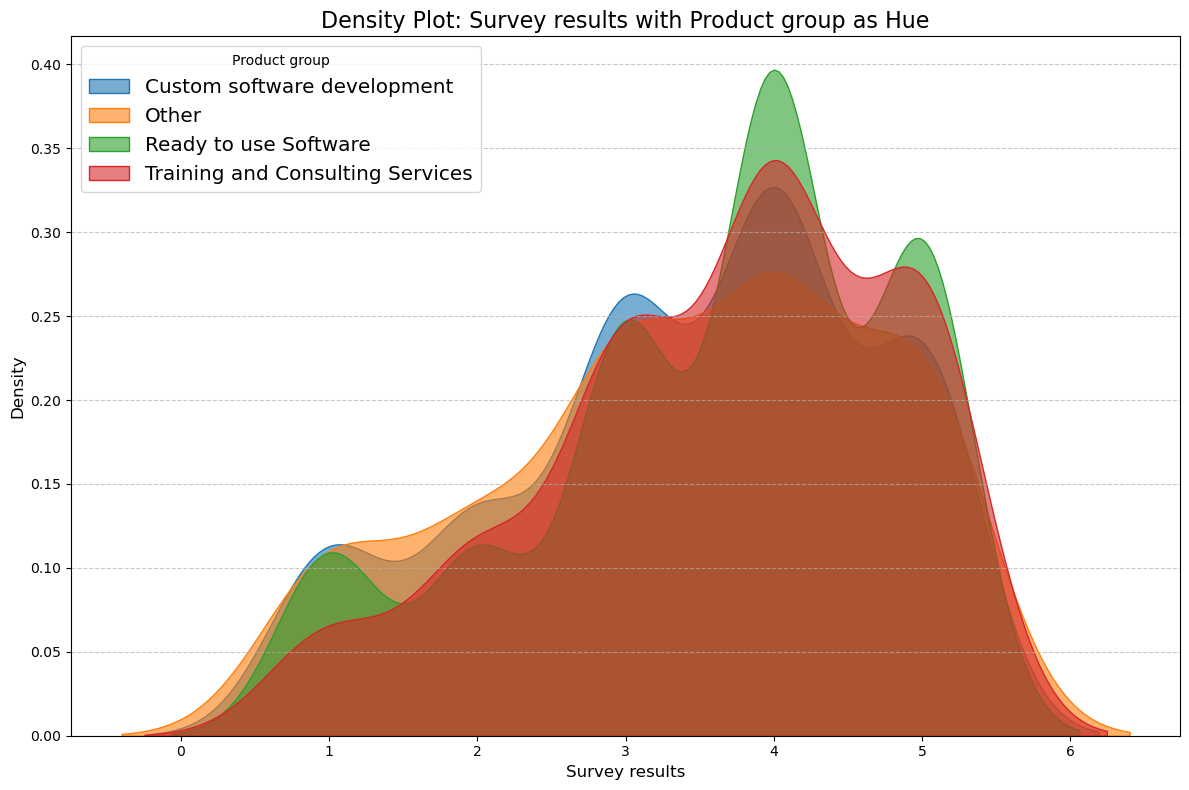

In [99]:
# KDE Plot with Survey Results on x-axis, density on y-axis, and Topic as hue
df_cleaned['Product group'] = df_cleaned['Product group'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['Product group'].cat.categories  # Get categories

for category in categories:
    subset = df_cleaned[df_cleaned['Product group'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Product group as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Product group', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

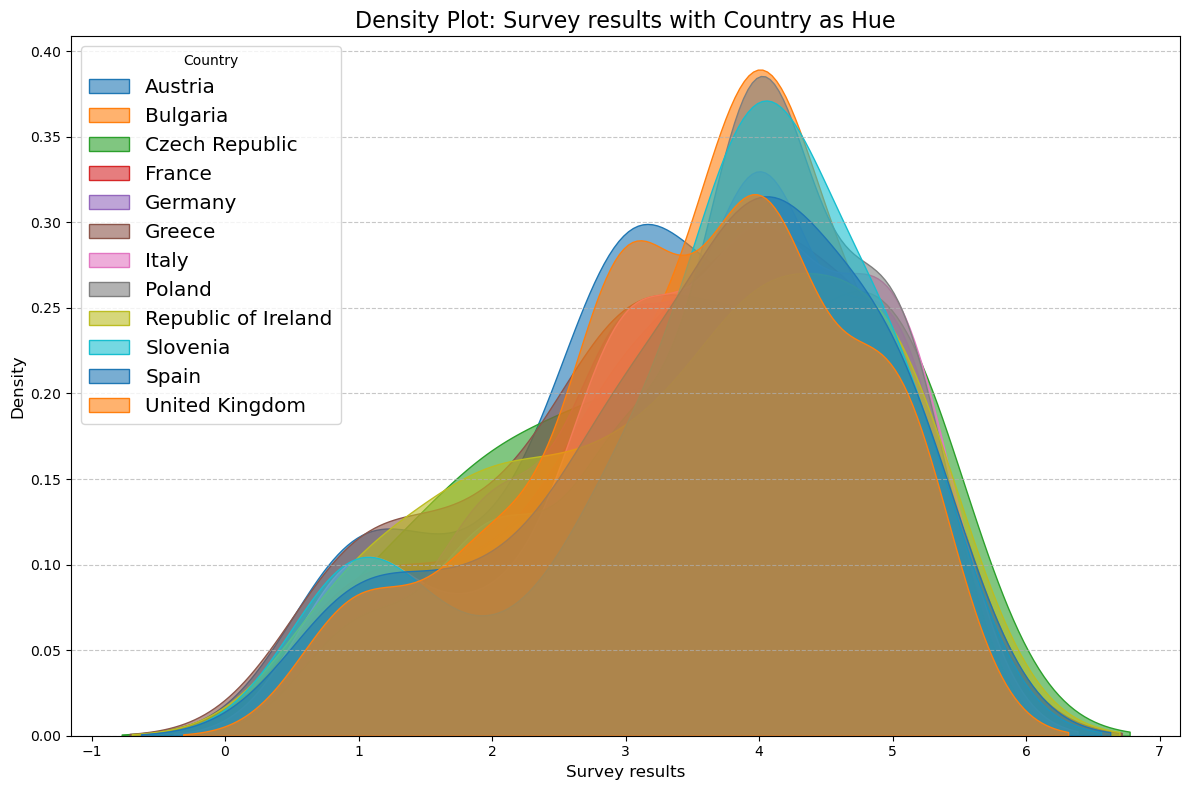

In [100]:
# KDE Plot with Survey Results on x-axis, density on y-axis, and Topic as hue
df_cleaned['Country'] = df_cleaned['Country'].astype('category')
plt.figure(figsize=(12, 8))
categories = df_cleaned['Country'].cat.categories  # Get categories

for category in categories:
    subset = df_cleaned[df_cleaned['Country'] == category]
    sns.kdeplot(
        data=subset,
        x='Survey results',
        fill=True,
        alpha=0.6,
        label=f'{category}'
    )

plt.title('Density Plot: Survey results with Country as Hue', fontsize=16)
plt.xlabel('Survey results', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Country', loc='upper left', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [116]:
# Converting the 'Time to First Response (Hours)' column to float
df_cleaned['Time to First Response (Hours)'] = df_cleaned['Time to First Response (Hours)'].astype(float)


In [118]:
df_cleaned['Time to First Response (Hours)'].describe()

count    1173.000000
mean        0.415571
std         1.100886
min       -18.757845
25%         0.021177
50%         0.088431
75%         0.589725
max         7.681201
Name: Time to First Response (Hours), dtype: float64

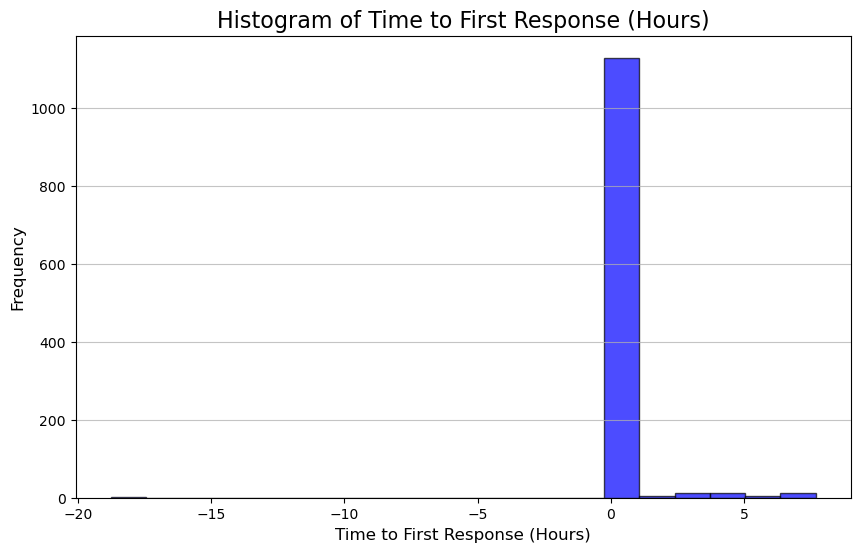

In [119]:
# Plotting a histogram for the 'Time to First Response (Hours)' column
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Time to First Response (Hours)'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Time to First Response (Hours)', fontsize=16)
plt.xlabel('Time to First Response (Hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

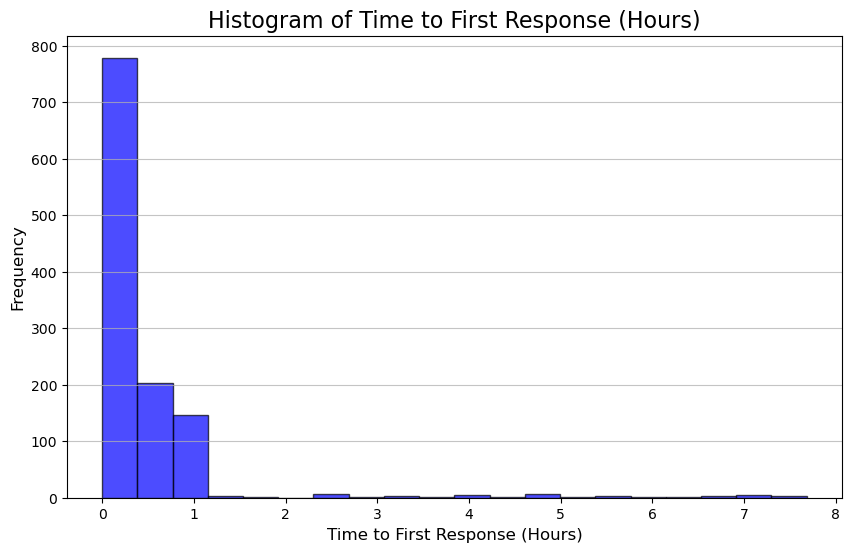

In [120]:
# Dropping rows where 'Time to First Response (Hours)' has negative values
df_cleaned = df_cleaned[df_cleaned['Time to First Response (Hours)'] >= 0]
# Plotting a histogram for the 'Time to First Response (Hours)' column
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Time to First Response (Hours)'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Time to First Response (Hours)', fontsize=16)
plt.xlabel('Time to First Response (Hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [122]:
df_cleaned['Time to Resolve (Hours)'].describe()

count    1172.000000
mean       33.138552
std        32.928671
min         0.033051
25%        10.575520
50%        21.887109
75%        41.994981
max       146.846661
Name: Time to Resolve (Hours), dtype: float64

In [123]:
# Splitting the 'Time to First Response (Hours)' column into 3 groups: Long, Medium, Short
df_cleaned['Time to First Response Group'] = pd.cut(
    df_cleaned['Time to First Response (Hours)'],
    bins=[-float('inf'), 0.5, 1, 2, float('inf')],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

df_cleaned.head()

C:\Users\makar\AppData\Local\Temp\ipykernel_28636\2420037432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time to First Response Group'] = pd.cut(


Status  Ticket ID Priority Source                     Topic  \
0  Closed       1012      Low  Email           Feature request   
3  Closed       1015   Medium  Email     Pricing and licensing   
4  Closed       1016      Low  Email             Product setup   
5  Closed       1017      Low  Email  Purchasing and invoicing   
6  Closed       1018      Low  Phone             Product setup   

        Agent Group           Agent Name        Created time  \
0  1st line support      Kristos Westoll 2023-01-02 00:58:36   
3  1st line support  Connor Danielovitch 2023-01-03 03:09:39   
4  1st line support      Kristos Westoll 2023-01-03 00:03:58   
5  1st line support        Sheela Cutten 2023-01-03 14:25:42   
6  1st line support      Kristos Westoll 2023-01-03 15:32:02   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023-01-02 01:58:36   
3     2023-01-05 03:09:39            2023-01-03 04:09:39   
4     2023-01-05 00:03:58            2023-01-03 01:03:58   
5     2023-01-05 14:25:42            2023-01-03 15:25:42   
6     2023-01-05 15:32:02            2023-01-03 15:34:02   

      First response time SLA For first response         Resolution time  \
0 2023-01-02 01:03:17.432             Within SLA 2023-01-04 00:31:51.694   
3 2023-01-03 07:09:15.835           SLA Violated 2023-01-04 14:32:34.979   
4 2023-01-03 00:08:01.684             Within SLA 2023-01-04 12:03:05.986   
5 2023-01-03 14:45:14.430             Within SLA 2023-01-04 01:55:56.533   
6 2023-01-03 15:34:00.278             Within SLA 2023-01-05 03:51:37.031   

  SLA For Resolution              Close time Agent interactions  \
0         Within SLA 2023-01-04 04:02:59.013                1.0   
3         Within SLA 2023-01-08 04:24:54.771               10.0   
4         Within SLA 2023-01-06 06:05:08.637                1.0   
5         Within SLA 2023-01-10 16:41:07.865                2.0   
6         Within SLA 2023-01-07 21:52:35.202                2.0   

   Survey results                Product group Support Level  \
0             3.0  Custom software development        Tier 1   
3             4.0        Ready to use Software        Tier 1   
4             2.0                        Other        Tier 1   
5             2.0        Ready to use Software        Tier 1   
6             3.0        Ready to use Software        Tier 1   

               Country   Latitude  Longitude  Created time Year  \
0  Republic of Ireland  53.094024  -8.019675               2023   
3                Spain  39.673370  -4.767726               2023   
4              Austria  47.696472  13.345735               2023   
5               Greece  39.368279  21.863141               2023   
6  Republic of Ireland  53.094024  -8.019675               2023   

   Created time Month  Created time Day Created time Weekday  \
0                   1                 2               Monday   
3                   1                 3              Tuesday   
4                   1                 3              Tuesday   
5                   1                 3              Tuesday   
6                   1                 3              Tuesday   

  Created time Time  Expected SLA to resolve Year  \
0          00:58:36                          2023   
3          03:09:39                          2023   
4          00:03:58                          2023   
5          14:25:42                          2023   
6          15:32:02                          2023   

   Expected SLA to resolve Month  Expected SLA to resolve Day  \
0                              1                            4   
3                              1                            5   
4                              1                            5   
5                              1                            5   
6                              1                            5   

  Expected SLA to resolve Weekday Expected SLA to resolve Time  \
0                       Wednesday                  

In [124]:
# Dropping all columns except the specified ones
columns_to_keep = [
    "Priority", "Source", "Topic", "Agent Name",
    "SLA For first response", "SLA For Resolution",
    "Survey results", "Country", "Time to Resolve Group", "Time to First Response Group"
]

# Keeping only the specified columns
df_prepro = df_cleaned[columns_to_keep]



In [125]:
df_prepro.head()

Priority Source                     Topic           Agent Name  \
0      Low  Email           Feature request      Kristos Westoll   
3   Medium  Email     Pricing and licensing  Connor Danielovitch   
4      Low  Email             Product setup      Kristos Westoll   
5      Low  Email  Purchasing and invoicing        Sheela Cutten   
6      Low  Phone             Product setup      Kristos Westoll   

  SLA For first response SLA For Resolution  Survey results  \
0             Within SLA         Within SLA             3.0   
3           SLA Violated         Within SLA             4.0   
4             Within SLA         Within SLA             2.0   
5             Within SLA         Within SLA             2.0   
6             Within SLA         Within SLA             3.0   

               Country Time to Resolve Group Time to First Response Group  
0  Republic of Ireland                  Long                        Short  
3                Spain                Medium                    Very Long  
4              Austria                Medium                        Short  
5               Greece            Very Short                        Short  
6  Republic of Ireland                  Long                        Short

In [126]:
# Perform one-hot encoding on all categorical columns in the dataset

# Checking the data types to identify categorical columns
categorical_columns = df_prepro.select_dtypes(include=['object', 'category']).columns

# Applying one-hot encoding to the categorical columns
df_prepro_encoded = pd.get_dummies(df_prepro, columns=categorical_columns, drop_first=True)

# Displaying the resulting dataset after encoding
df_prepro_encoded.head()


Survey results  Priority_Low  Priority_Medium  Source_Email  Source_Phone  \
0             3.0          True            False          True         False   
3             4.0         False             True          True         False   
4             2.0          True            False          True         False   
5             2.0          True            False          True         False   
6             3.0          True            False         False          True   

   Topic_Feature request  Topic_Other  Topic_Pricing and Licensing  \
0                   True        False                        False   
3                  False        False                        False   
4                  False        False                        False   
5                  False        False                        False   
6                  False        False                        False   

   Topic_Pricing and licensing  Topic_Product setup  \
0                        False                False   
3                         True                False   
4                        False                 True   
5                        False                False   
6                        False                 True   

   Topic_Purchasing and invoicing  Topic_Training request  \
0                           False                   False   
3                           False                   False   
4                           False                   False   
5                            True                   False   
6                           False                   False   

   Agent Name_Bernard Beckley  Agent Name_Connor Danielovitch  \
0                       False                           False   
3                       False                            True   
4                       False                           False   
5                       False                           False   
6                       False                           False   

   Agent Name_Heather Urry  Agent Name_Kristos Westoll  \
0                    False                        True   
3                    False                       False   
4                    False                        True   
5                    False                       False   
6                    False                        True   

   Agent Name_Michele Whyatt  Agent Name_Nicola Wane  \
0                      False                   False   
3                      False                   False   
4                      False                   False   
5                      False                   False   
6                      False                   False   

   Agent Name_Sheela Cutten  SLA For first response_Within SLA  \
0                     False                               True   
3                     False                              False   
4                     False                               True   
5                      True                               True   
6                     False                               True   

   SLA For Resolution_Within SLA  Country_Bulgaria  Country_Czech Republic  \
0                           True             False                   False   
3                           True             False                   False   
4                           True             False                   False   
5                           True             False                   False   
6                           True             False                   False   

   Country_France  Country_Germany  Country_Greece  Country_Italy  \
0           False            False           False          False   
3           False            False           False          False   
4           False            False           False          False   
5           False            False            True          False   
6           False            False           False          False   

   Country_Poland  Country_Republic of Irelan

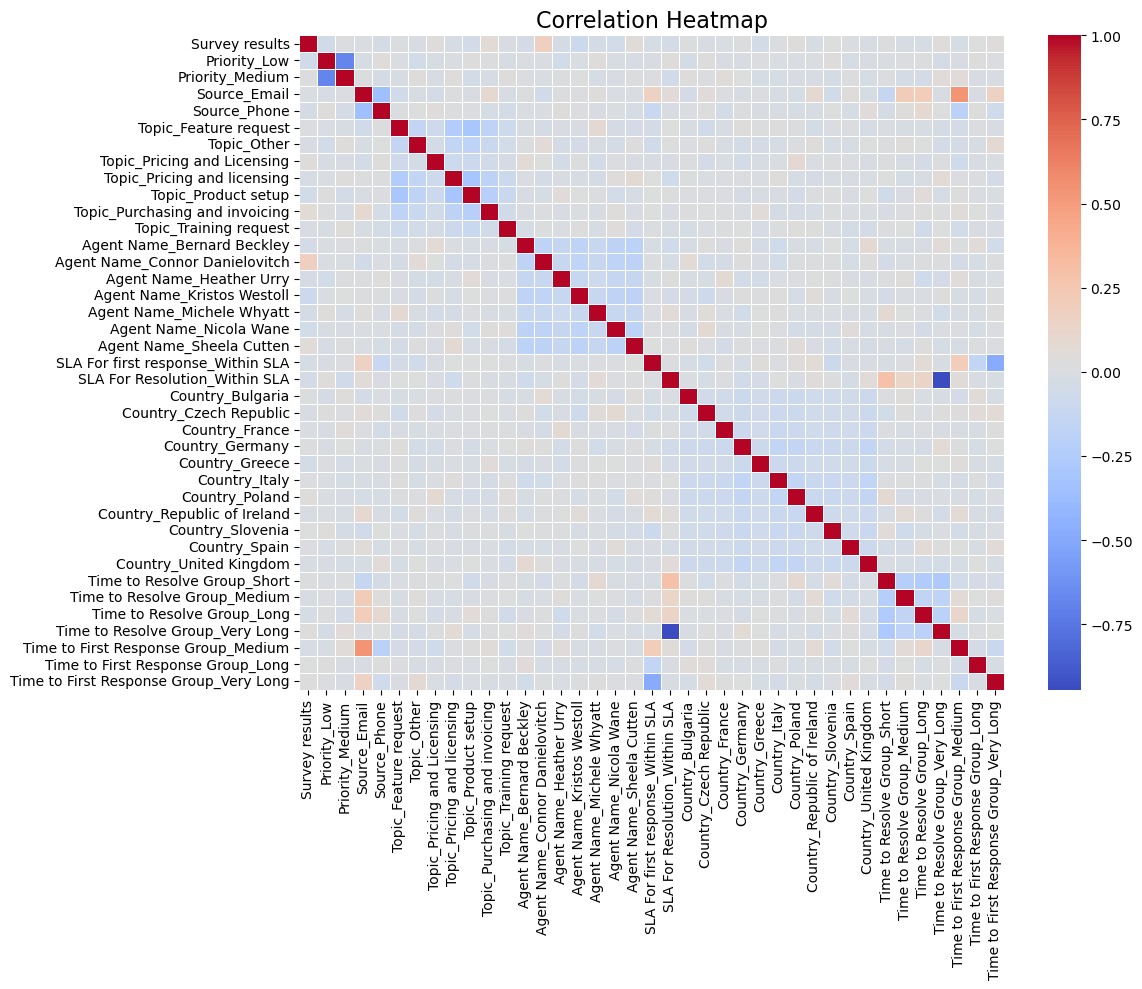

In [128]:
# Calculating the correlation matrix for the encoded DataFrame
correlation_matrix = df_prepro_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()